# Projekat 1 - nadgledano učenje

# Preprocesiranje

### Importovanje biblioteka

In [366]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import shap
from lime.lime_tabular import LimeTabularExplainer
%matplotlib inline

### Učitavanje podataka

In [367]:
df=pd.read_csv("spg.csv")

### Dimenzije dataset-a

In [368]:
df.shape

(4213, 21)

### Prikaz prvih 5 redova

In [369]:
df.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

### Prikaz zadnjih 5 redova

In [370]:
df.tail()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
4208                       1025.1                      0.0   
4209                       1026.1                      0.0   
4210                       1026.3                      0.1   
4211                       1025.5                      0.0   
4212                       1025.3                      0.0   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
4208                  0.0                  100.0   
4209                  0.0                  100.0   
4210                  0.0                  100.0   
4211                  0.0                  100.0   
4212                  0.0                  100.0   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
4208                            100                             100   
4209                             79                             100   
4210                             73                             100   
4211                             74                              66   
4212                            100                             100   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
4208                          100                             257.21  ...   
4209                          100                             210.04  ...   
4210                          100                             113.92  ...   
4211                          100                             186.90  ...   
4212                          100                             172.66  ...   

      wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
4208                         285.42                      25.50   
4209                           6.91                      13.00   
4210                           2.29                       8.71   
4211                          11.31                       6.29   
4212                          12.72                      12.07   

      wind_direction_80_m_above_gnd  wind_speed_900_mb  wind_direction_900_mb  \
4208                         283.06              24.01                 282.99   
4209                           4.76              11.61                   7.13   
4210                         352.87               7.95                 354.81   
4211                          13.24               5.94                  14.04   
4212                          17.35              11.38                  18.43   

      wind_gust_10_m_above_gnd  angle_of_incidence     zenith    azimuth  \
4208                     25.20           22.700907  64.952098  167.06794   
4209                     10.44           19.307487  63.895118  182.28247   
4210                     22.32           25.249506  65.827032  197.33868   
4211                     15.48           36.361161  70.496313  211.30027   
4212                     16.20           48.452849  76.919574  223.04931   

      generated_power_kw  
4208          173.410560  
4209          403.792220  
4210          158.367780  
4211          126.953060  
4212           20.055031  

[5 rows x 21 columns]

### Opis atributa dataset-a

temperature_2_m_above_gnd = Temperatura vazduha izmerena na visini od 2m iznad zemlje ($^{\circ}C$) <br>
relative_humidity_2_m_above_gnd = Relativna vlažnost vazduha izmerena na visini od 2m iznad zemlje ($\%$) <br>
mean_sea_level_pressure_MSL = Srednji pritisak na nivou mora ($hPa$) <br>
total_precipitation_sfc = Ukupna količina padavina na površini ($mm$) <br>
snowfall_amount_sfc = Količina snega koja je pala na površini ($mm$) <br>
total_cloud_cover_sfc = Ukupni procenat pokrivenosti oblacima iznad površine ($\%$) <br>
high_cloud_cover_high_cld_lay = Pokrivenost visokim oblacima ($\%$) <br>
medium_cloud_cover_mid_cld_lay = Pokrivenost srednjim oblacima ($\%$) <br>
low_cloud_cover_low_cld_lay = Pokrivenost niskim oblacima ($\%$) <br>
shortwave_radiation_backwards_sfc = Količina kratkotalasnog zračenja koje se reflektuje od površine ($W/m^2$) <br>
wind_speed_10_m_above_gnd = Brzina vetra na visini od 10 metara iznad zemlje ($m/s$) <br>
wind_direction_10_m_above_gnd = Pravac vetra na visini od 10 metara iznad zemlje ($^{\circ}$) <br>
wind_speed_80_m_above_gnd = Brzina vetra na visini od 80 metara iznad zemlje ($m/s$) <br>
wind_direction_80_m_above_gnd= Pravac vetra na visini od 80 metara iznad zemlje ($^{\circ}$) <br>
wind_speed_900_mb = Brzina vetra na nivou pritiska od 900 mb ($m/s$) <br>
wind_direction_900_mb = Pravac vetra na nivou pritiska od 900 mb ($^{\circ}$) <br>
wind_gust_10_m_above_gnd = Najjači nalet vetra na visini od 10 metara iznad zemlje ($m/s$) <br>
angle_of_incidence = Ugao pod kojim sunčevi zraci padaju na površinu ($^{\circ}$) <br>
zenith = Ugao između sunca i vertikale ($^{\circ}$) <br>
azimuth = Pravac sunca u horizontalnoj ravni ($^{\circ}$) <br>

### Izlazni atribut
generated_power_kw = Količina generisane energije iz solarnih panela ($kW$)

### Prikaz tipova podataka

In [371]:
df.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

### Prikaz informacija o podacima

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

### Provera da li postoje nedostajuće vrednosti

In [373]:
df.isna().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

### Provera da li postoje duplikati

In [374]:
duplicates=df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4208    False
4209    False
4210    False
4211    False
4212    False
Length: 4213, dtype: bool

In [375]:
print(f"Broj duplikata je: {duplicates.sum()}")

Broj duplikata je: 0


### Statistički opis

In [376]:
df.describe().T

count         mean         std  \
temperature_2_m_above_gnd          4213.0    15.068111    8.853677   
relative_humidity_2_m_above_gnd    4213.0    51.361025   23.525864   
mean_sea_level_pressure_MSL        4213.0  1019.337812    7.022867   
total_precipitation_sfc            4213.0     0.031759    0.170212   
snowfall_amount_sfc                4213.0     0.002808    0.038015   
total_cloud_cover_sfc              4213.0    34.056990   42.843638   
high_cloud_cover_high_cld_lay      4213.0    14.458818   30.711707   
medium_cloud_cover_mid_cld_lay     4213.0    20.023499   36.387948   
low_cloud_cover_low_cld_lay        4213.0    21.373368   38.013885   
shortwave_radiation_backwards_sfc  4213.0   387.759036  278.459293   
wind_speed_10_m_above_gnd          4213.0    16.228787    9.876948   
wind_direction_10_m_above_gnd      4213.0   195.078452  106.626782   
wind_speed_80_m_above_gnd          4213.0    18.978483   11.999960   
wind_direction_80_m_above_gnd      4213.0   191.166862  108.760021   
wind_speed_900_mb                  4213.0    16.363190    9.885330   
wind_direction_900_mb              4213.0   192.447911  106.516195   
wind_gust_10_m_above_gnd           4213.0    20.583489   12.648899   
angle_of_incidence                 4213.0    50.837490   26.638965   
zenith                             4213.0    59.980947   19.857711   
azimuth                            4213.0   169.167651   64.568385   
generated_power_kw                 4213.0  1134.347313  937.957247   

                                          min          25%          50%  \
temperature_2_m_above_gnd           -5.350000     8.390000    14.750000   
relative_humidity_2_m_above_gnd      7.000000    32.000000    48.000000   
mean_sea_level_pressure_MSL        997.500000  1014.500000  1018.100000   
total_precipitation_sfc              0.000000     0.000000     0.000000   
snowfall_amount_sfc                  0.000000     0.000000     0.000000   
total_cloud_cover_sfc                0.000000     0.000000     8.700000   
high_cloud_cover_high_cld_lay        0.000000     0.000000     0.000000   
medium_cloud_cover_mid_cld_lay       0.000000     0.000000     0.000000   
low_cloud_cover_low_cld_lay          0.000000     0.000000     0.000000   
shortwave_radiation_backwards_sfc    0.000000   142.400000   381.810000   
wind_speed_10_m_above_gnd            0.000000     9.010000    14.460000   
wind_direction_10_m_above_gnd        0.540000   153.190000   191.770000   
wind_speed_80_m_above_gnd            0.000000    10.140000    16.240000   
wind_direction_80_m_above_gnd        1.120000   130.240000   187.770000   
wind_speed_900_mb                    0.000000     9.180000    14.490000   
wind_direction_900_mb                1.120000   148.220000   187.990000   
wind_gust_10_m_above_gnd             0.720000    11.160000    18.000000   
angle_of_incidence                   3.755323    29.408181    47.335557   
zenith                              17.727761    45.291631    62.142611   
azimuth                             54.379093   114.136600   163.241650   
generated_power_kw                   0.000595   231.700450   971.642650   

                                           75%         max  
temperature_2_m_above_gnd            21.290000    34.90000  
relative_humidity_2_m_above_gnd      70.000000   100.00000  
mean_sea_level_pressure_MSL        1023.600000  1046.80000  
total_precipitation_sfc               0.000000     3.20000  
snowfall_amount_sfc                   0.000000     1.68000  
total_cloud_cover_sfc               100.000000   100.00000  
high_cloud_cover_high_cld_lay         9.000000   100.00000  
medium_cloud_cover_mid_cld_lay       10.000000   100.00000  
low_cloud_cover_low_cld_lay          10.000000   100.00000  
shortwave_radiation_backwards_sfc   599.860000   952.30000  
wind_speed_10_m_above_gnd            21.840000    61.18000  
wind_direction_10_m_above_gnd       292.070000   360.00000  
wind_speed_80_m_above_gnd            26.140000    6

### Distribucija atributa

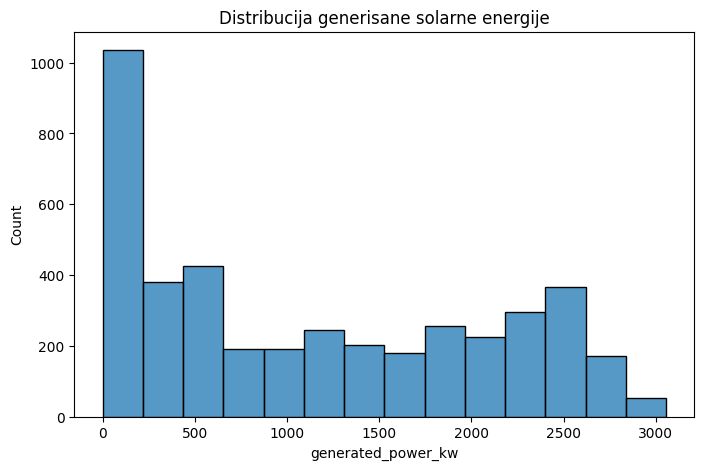

In [377]:
plt.figure(figsize=(8,5))
plt.title(f"Distribucija generisane solarne energije")
sns.histplot(df['generated_power_kw'])
plt.show()

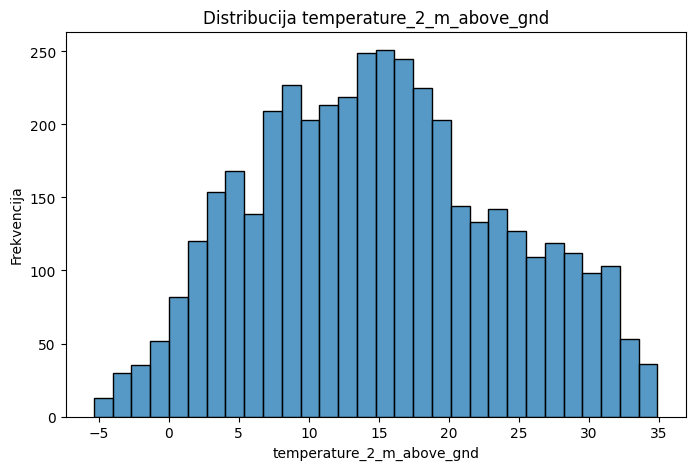

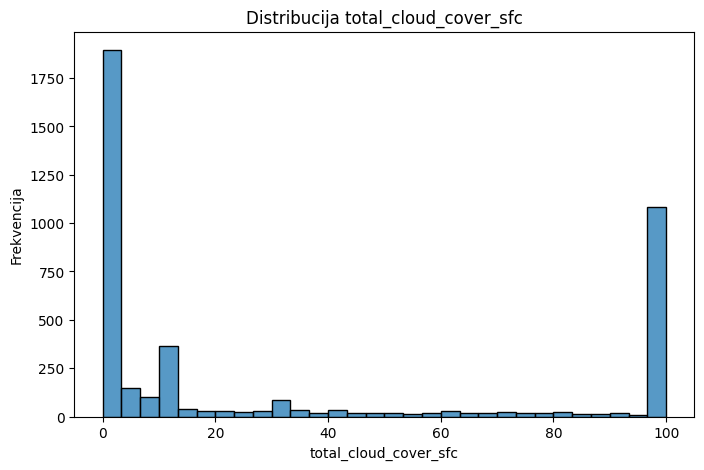

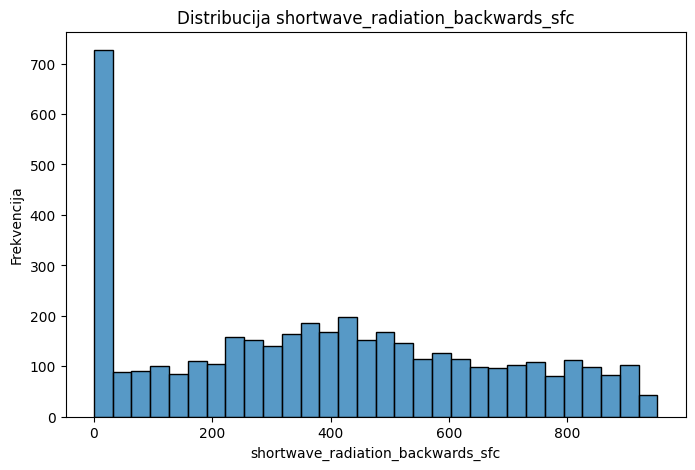

In [ ]:
features = ['temperature_2_m_above_gnd', 'total_cloud_cover_sfc', 'shortwave_radiation_backwards_sfc']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30)
    plt.title(f"Distribucija {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekvencija")
    plt.show()

### Boxplot

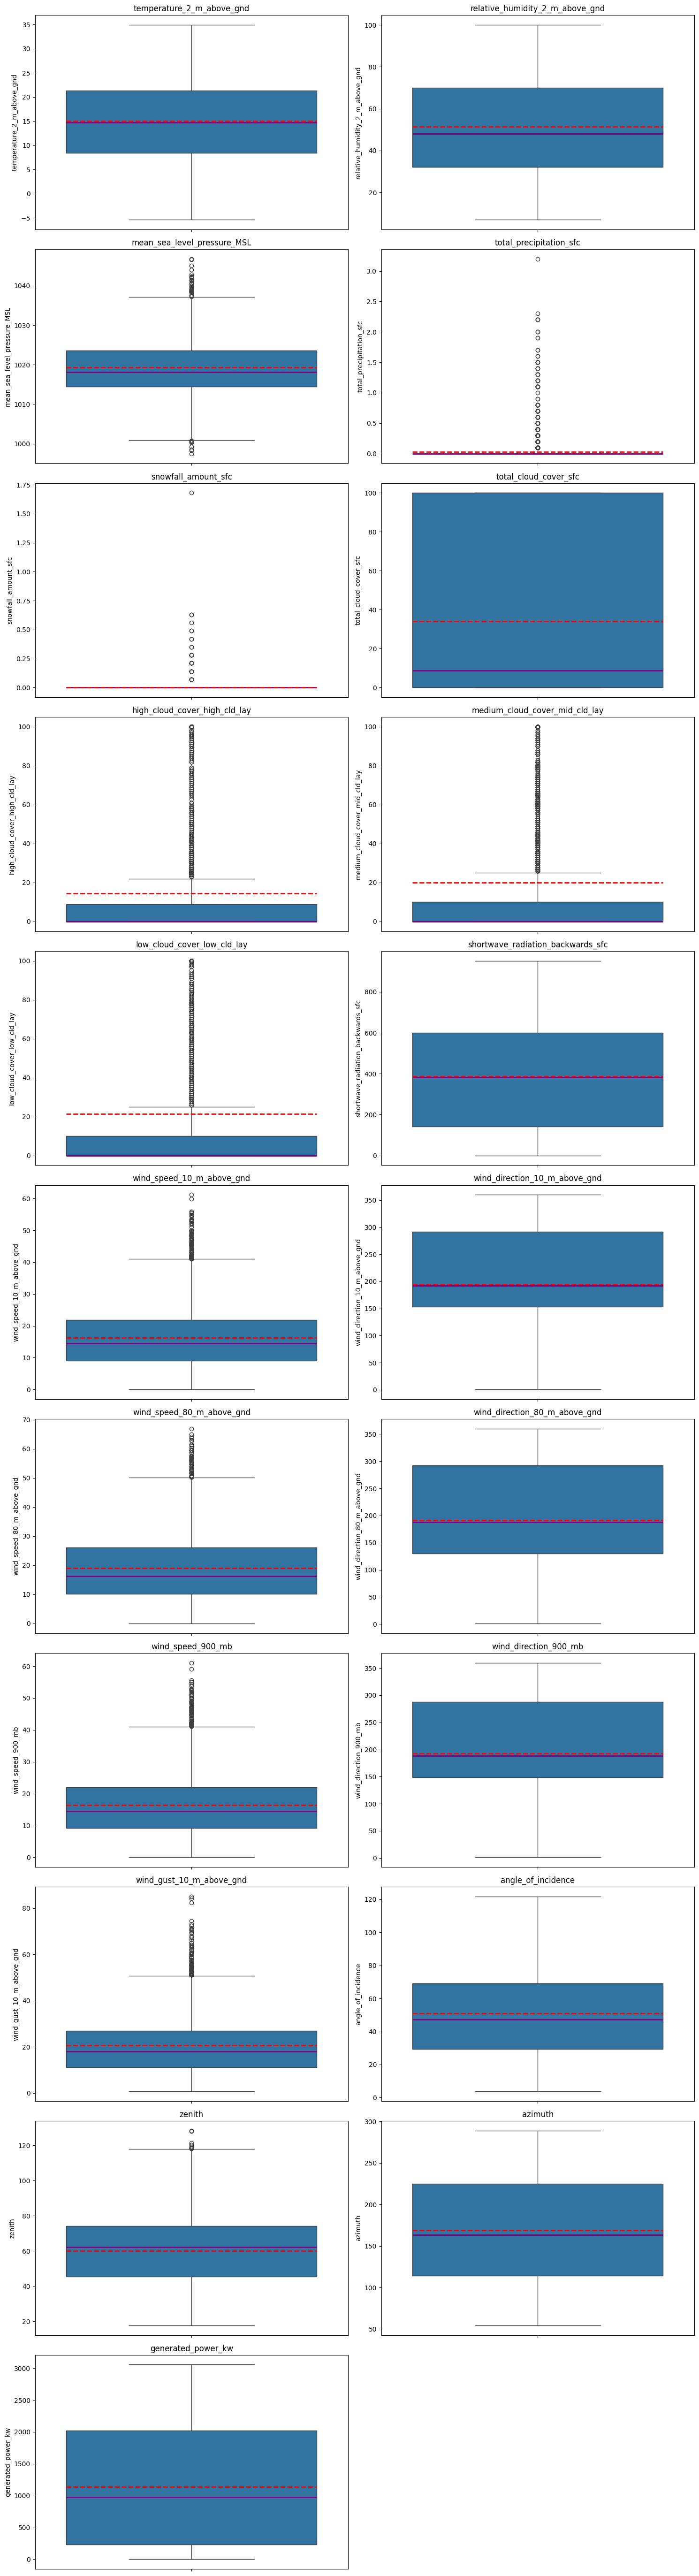

In [379]:
cols = 2 
rows = math.ceil(df.shape[1] / cols)

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(
        y=df[feature], 
        showmeans=True, 
        meanline=True,
        meanprops={'color': 'red', 'linewidth': 2},
        medianprops={'color': 'purple', 'linewidth': 2}
    )
    plt.title(f"{feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Violin plot

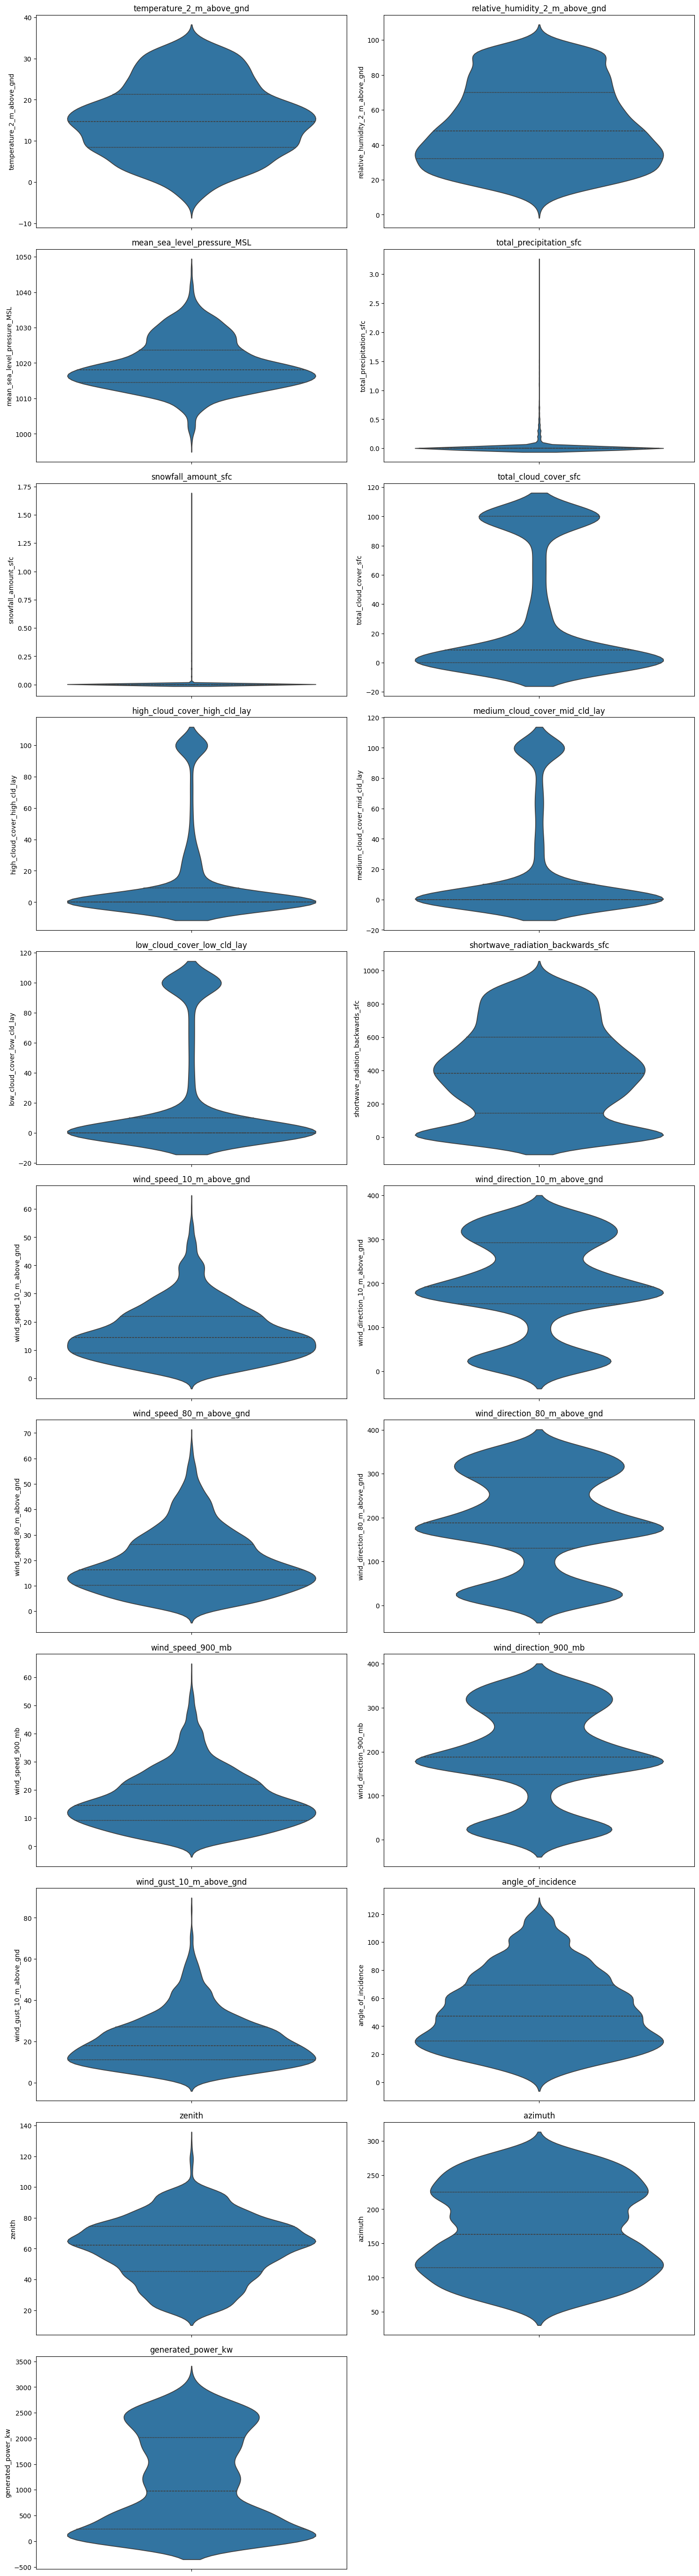

In [380]:
plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    
    sns.violinplot(
        y=df[feature],
        inner="quart"
    )
    
    plt.title(f"{feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Scatter plot

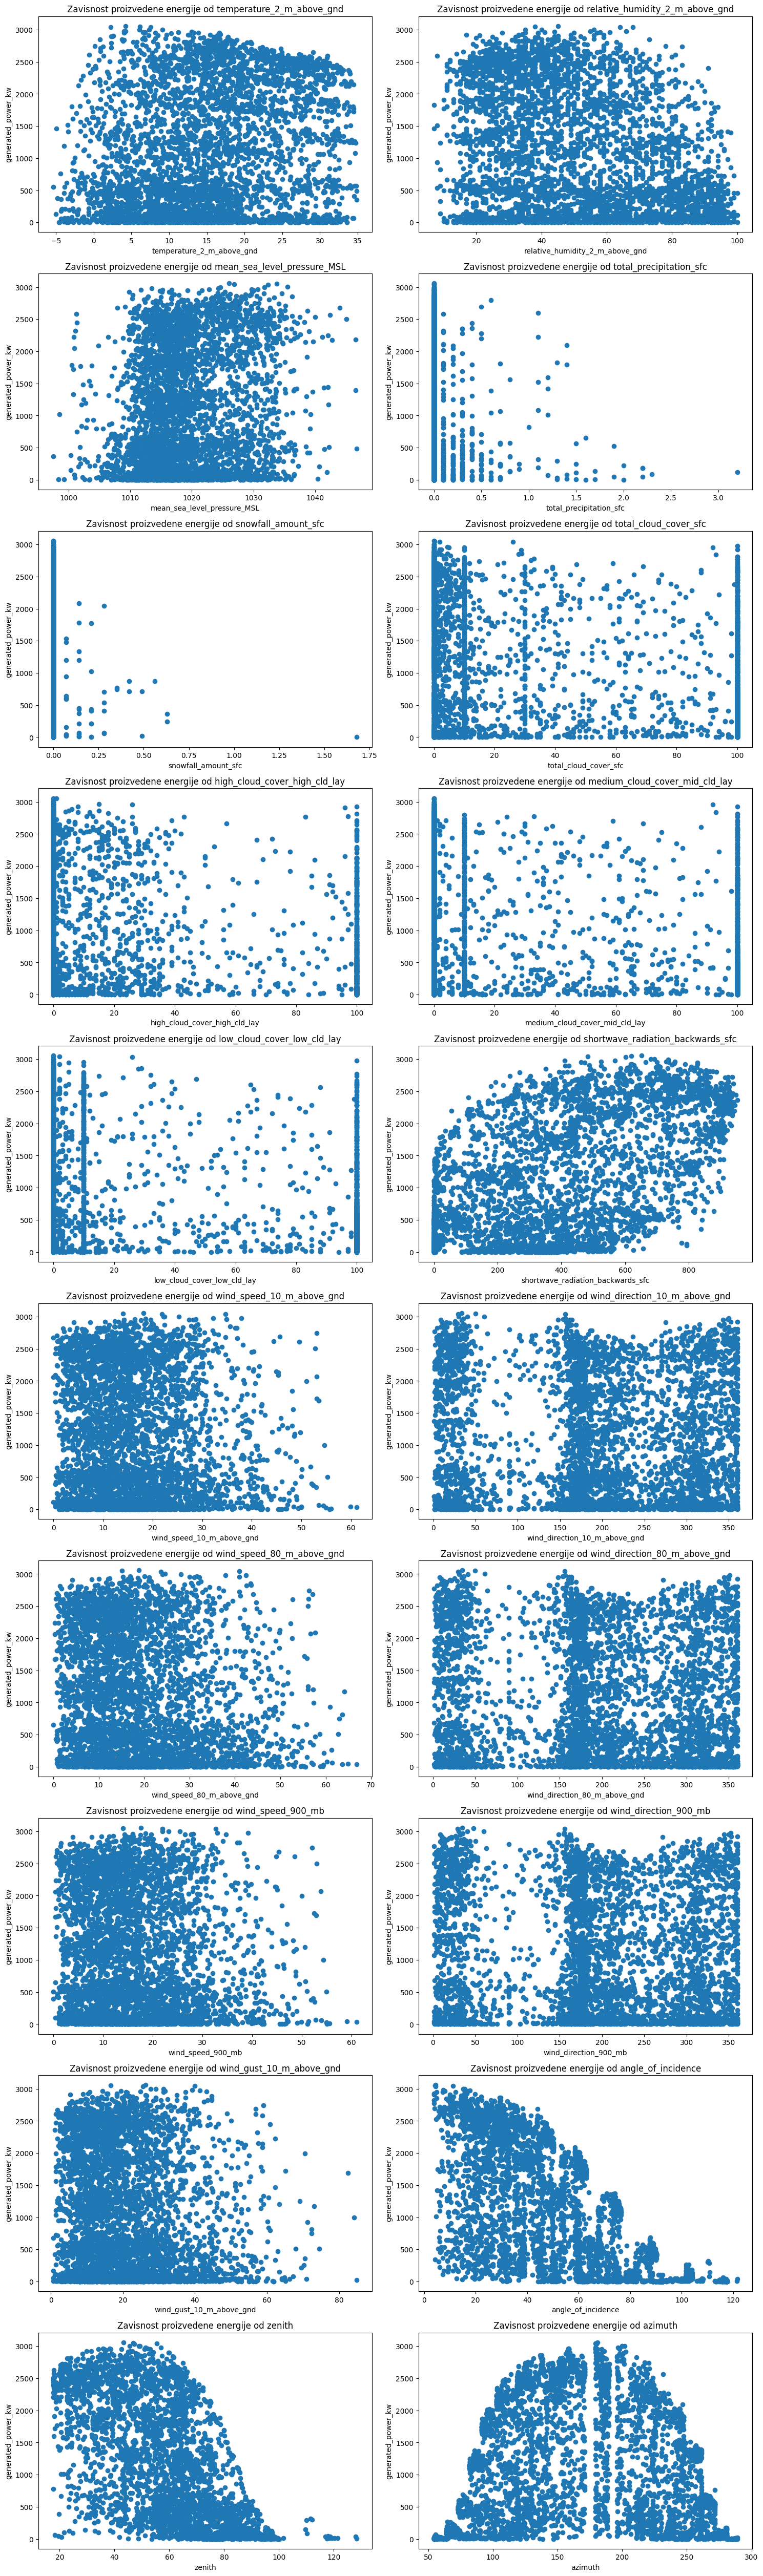

In [381]:
plt.figure(figsize=(15, 5 * rows))

input_columns = [col for col in df.columns if col != 'generated_power_kw']

for i, feature in enumerate(input_columns):
    plt.subplot(rows, cols, i + 1)

    x=df[feature]
    y=df['generated_power_kw']
    plt.scatter(x,y)
    
    plt.title(f"Zavisnost proizvedene energije od {feature}")
    plt.xlabel(feature)
    plt.ylabel('generated_power_kw')

plt.tight_layout()
plt.show()

**Zavisnost od temperature:** Većina podataka je ravnomerno raspoređena bez obzira na temperaturu i nema jasne zavisnosti između temperature i proizvedene solarne energije.

**Zavisnost od relativne vlažnosti:** Slično prethodnom grafikonu, ne primećuje se direktna zavisnost između relativne vlažnosti i proizvedene solarne energije.

**Zavisnost od pritiska na nivou mora:** Postoji gušća koncentracija podataka u srednjem opsegu pritiska (1005–1025 hPa).

**Zavisnost od padavina:** Najveća koncentracija proizvedene energije dolazi kada su padavine minimalne (blizu nule). Kako se povećava količina padavina, proizvodnja energije opada.

...

**Zavisnost od zenith:** Vidljivo je da kako zenith raste, proizvedena energija opada. Ovo je očekivano, jer veći ugao zenith (bliže horizontu) smanjuje količinu solarne energije koja dolazi direktno do panela. 

**Zavisnost od azimuth:** Zavisnost nije toliko očigledna kao kod zenith, ali deluje da se veća energija proizvodi kada je azimuth u određenim rasponima (oko 150-250 stepeni). Ovo može ukazivati na optimalnu orijentaciju panela prema suncu u toku dana.

### Matrica korelacije

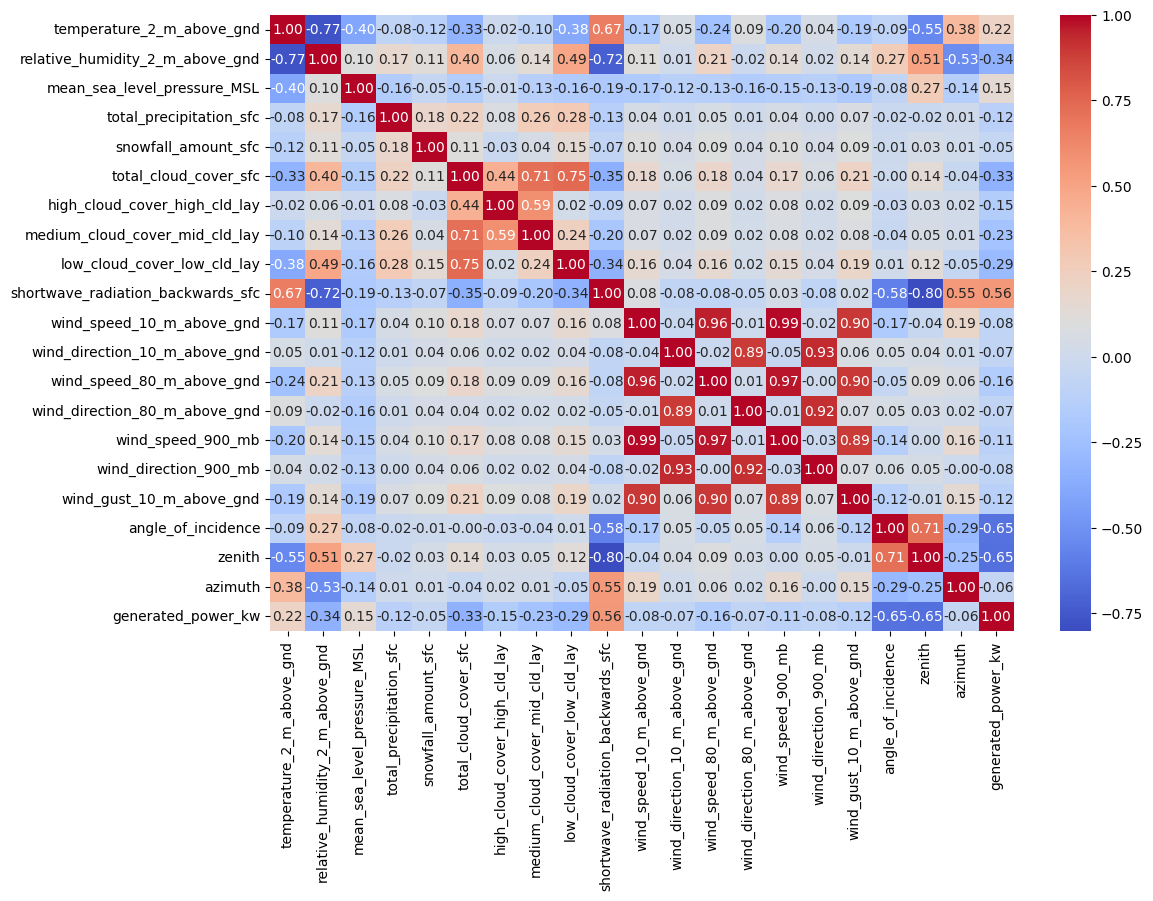

In [382]:
plt.figure(figsize=(12, 8))
df_corr=df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Može se primetiti visoka korelacija između sledećih atributa:
- **medium_cloud_cover_mid_cld_lay** i **total_cloud_cover_sfc**
- **low_cloud_cover_mid_cld_lay** i **total_cloud_cover_sfc**
- **wind_speed_80_m_above_gnd** i **wind_speed_10_m_above_gnd**
- **wind_speed_900_mb** i **wind_speed_10_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_10_m_above_gnd**
- **wind_direction_80_m_above_gnd** i **wind_direction_10_m_above_gnd**
- **wind_direction_900_mb** i **wind_direction_10_m_above_gnd**
- **wind_speed_900_mb** i **wind_speed_80_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_80_m_above_gnd**
- **wind_direction_900_mb** i **wind_direction_80_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_900_mb**
- **zenith** i **angle_of_incidence**
  
Ovo ukazuje na to da postoji neka vrsta linearne povezanosti između ovih atributa, što se može iskoristiti za redukciju broja atributa.

Atributi koji će se odstraniti na osnovu ovoga su:
- medium_cloud_cover_mid_cld_lay
- low_cloud_cover_low_cld_lay
- wind_speed_80_m_above_gnd
- wind_speed_900_mb
- wind_gust_10_m_above_gnd
- wind_direction_80_m_above_gnd
- wind_direction_900_mb


Mozda se mogu odstraniti:
- wind_direction_10_m_above_gnd 
- jedan od zenith i angle_of_incidence

angle_of_incidence direktno utiče na količinu sunčevog zračenja koje dolazi do panela i obično je intuitivnije povezati ga sa solarnom proizvodnjom. Zadržavanje oba atributa može povećati kompleksnost modela bez značajne koristi. Mogu se proveriti performanse modela sa oba i sa jednim atributom. Ako se performanse modela ne menjaju značajno, to potvrđuje da je drugi atribut suvišan.

### Izbacivanje kolona

In [383]:
features_to_drop = [
    'medium_cloud_cover_mid_cld_lay',
    'low_cloud_cover_low_cld_lay',
    'wind_speed_80_m_above_gnd',
    'wind_speed_900_mb',
    'wind_gust_10_m_above_gnd',
    'wind_direction_80_m_above_gnd',
    'wind_direction_900_mb'
]

df2 = df.drop(columns=features_to_drop, axis=1)
print(f"Nove dimenzije: {df2.shape}")
df2.head()

Nove dimenzije: (4213, 14)


temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   shortwave_radiation_backwards_sfc  wind_speed_10_m_above_gnd  \
0                               0.00                       6.37   
1                               1.78                       5.15   
2                             108.58                       4.68   
3                             258.10                       3.60   
4                             375.58                       6.21   

   wind_direction_10_m_above_gnd  angle_of_incidence     zenith    azimuth  \
0                         312.71           58.753108  83.237322  128.33543   
1                         294.78           45.408585  75.143041  139.65530   
2                         270.00           32.848282  68.820648  152.53769   
3                         323.13           22.699288  64.883536  166.90159   
4                          10.01           19.199908  63.795208  182.13526   

   generated_power_kw  
0           454.10095  
1          1411.99940  
2          2214.84930  
3          2527.60920  
4          2640.20340

### Podela podataka na trening i test skup

In [384]:
X = df2.drop(columns=['generated_power_kw'], axis=1)
y = df2['generated_power_kw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Dimenzije trening skupa X:', X_train.shape)
print('Dimenzije trening skupa y:', y_train.shape)
print('Dimenzije test skupa X:', X_test.shape)
print('Dimenzije test skupa y:', y_test.shape)

Dimenzije trening skupa X: (3370, 13)
Dimenzije trening skupa y: (3370,)
Dimenzije test skupa X: (843, 13)
Dimenzije test skupa y: (843,)


# Regresioni modeli sa neskaliranim podacima

### Metoda za evaluaciju modela

In [385]:
""" 
Evaluacija modela ce se vrsiti i na trening skupu i na test skupu kako bi se mogli predvideti 
overfitting (dobre performanse na trening skupu, lose na test skupu) i underfitting (lose performanse
na oba skupa)
"""
def evaluate(y_true, y_test_pred, y_train, y_train_pred):
    r2_training=r2_score(y_train, y_train_pred)
    r2_test=r2_score(y_true, y_test_pred)
    
    mae_training=mean_absolute_error(y_train, y_train_pred)
    mae_test=mean_absolute_error(y_true, y_test_pred)
    
    mse_training=mean_squared_error(y_train, y_train_pred)
    mse_test=mean_squared_error(y_true, y_test_pred)

    metrics = {
        "r2_score_train": r2_training,
        "r2_score_test": r2_test,
        "mae_train": mae_training,
        "mae_test": mae_test,
        "mse_train": mse_training,
        "mse_test": mse_test
    }

    print(f"R2 score - training: {r2_training:.3f}")
    print(f"R2 score - test: {r2_test:.3f}")
    print(f"Mean Absolute Error - training: {mae_training:.3f}")
    print(f"Mean Absolute Error - test: {mae_test:.3f}")
    print(f"Mean Squared Error - training: {mse_training:.3f}")
    print(f"Mean Squared Error - test: {mse_test:.3f}")

    return metrics

### Kreiranje tabele sa rezultatima evaluacije

In [386]:
results = pd.DataFrame(columns=["Model", "R2 score - training", "R2 score - test", "MAE - training", "MAE - test", "MSE - training", "MSE - test"])
results

Empty DataFrame
Columns: [Model, R2 score - training, R2 score - test, MAE - training, MAE - test, MSE - training, MSE - test]
Index: []

In [387]:
def add_metrics(df, model, metrics):
    rows=df.shape[0]
    df.loc[rows+1]=[model, metrics['r2_score_train'], metrics['r2_score_test'], metrics['mae_train'], metrics['mae_test'], metrics['mse_train'], metrics['mse_test']]

    return df

### Baseline model - mean prediction

In [388]:
dummy=DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

y_train_pred=dummy.predict(X_train)
y_test_pred=dummy.predict(X_test)

metrics=evaluate(y_test, y_test_pred, y_train, y_train_pred)

R2 score - training: 0.000
R2 score - test: -0.000
Mean Absolute Error - training: 833.874
Mean Absolute Error - test: 863.382
Mean Squared Error - training: 871043.882
Mean Squared Error - test: 913608.019


In [389]:
results=add_metrics(results, "Baseline", metrics)
results

Model  R2 score - training  R2 score - test  MAE - training  MAE - test  \
1  Baseline                  0.0        -0.000158       833.87421  863.381969   

   MSE - training     MSE - test  
1   871043.882047  913608.019328

### Linear Regression

In [390]:
lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

metrics=evaluate(y_test, y_test_pred, y_train, y_train_pred)

R2 score - training: 0.701
R2 score - test: 0.720
Mean Absolute Error - training: 393.454
Mean Absolute Error - test: 389.065
Mean Squared Error - training: 260381.846
Mean Squared Error - test: 255479.323


In [391]:
results=add_metrics(results, "Linear Regression", metrics)
results

Model  R2 score - training  R2 score - test  MAE - training  \
1           Baseline             0.000000        -0.000158      833.874210   
2  Linear Regression             0.701069         0.720318      393.453639   

   MAE - test  MSE - training     MSE - test  
1  863.381969   871043.882047  913608.019328  
2  389.065399   260381.845935  255479.322720

### Random Forest Regression

In [392]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

metrics = evaluate(y_test, y_test_pred_rf, y_train, y_train_pred_rf)

R2 score - training: 0.970
R2 score - test: 0.816
Mean Absolute Error - training: 100.348
Mean Absolute Error - test: 256.626
Mean Squared Error - training: 25760.881
Mean Squared Error - test: 168330.139


In [393]:
results=add_metrics(results, "Random Forest Regression", metrics)
results

Model  R2 score - training  R2 score - test  \
1                  Baseline             0.000000        -0.000158   
2         Linear Regression             0.701069         0.720318   
3  Random Forest Regression             0.970425         0.815723   

   MAE - training  MAE - test  MSE - training     MSE - test  
1      833.874210  863.381969   871043.882047  913608.019328  
2      393.453639  389.065399   260381.845935  255479.322720  
3      100.348409  256.626350    25760.880748  168330.139003

### Decision Tree Regression

In [394]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

metrics = evaluate(y_test, y_test_pred_dt, y_train, y_train_pred_dt)

R2 score - training: 1.000
R2 score - test: 0.618
Mean Absolute Error - training: 0.000
Mean Absolute Error - test: 340.817
Mean Squared Error - training: 0.000
Mean Squared Error - test: 348960.664


In [395]:
results=add_metrics(results, "Decision Tree Regression", metrics)
results

Model  R2 score - training  R2 score - test  \
1                  Baseline             0.000000        -0.000158   
2         Linear Regression             0.701069         0.720318   
3  Random Forest Regression             0.970425         0.815723   
4  Decision Tree Regression             1.000000         0.617981   

   MAE - training  MAE - test  MSE - training     MSE - test  
1      833.874210  863.381969   871043.882047  913608.019328  
2      393.453639  389.065399   260381.845935  255479.322720  
3      100.348409  256.626350    25760.880748  168330.139003  
4        0.000000  340.816715        0.000000  348960.664432

### Gradient Boosting Regression

In [396]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

metrics = evaluate(y_test, y_test_pred_gbr, y_train, y_train_pred_gbr)

R2 score - training: 0.831
R2 score - test: 0.800
Mean Absolute Error - training: 262.872
Mean Absolute Error - test: 287.956
Mean Squared Error - training: 147505.742
Mean Squared Error - test: 183133.687


In [397]:
results=add_metrics(results, "Gradient Boosting Regression", metrics)
results

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.000158   
2             Linear Regression             0.701069         0.720318   
3      Random Forest Regression             0.970425         0.815723   
4      Decision Tree Regression             1.000000         0.617981   
5  Gradient Boosting Regression             0.830656         0.799517   

   MAE - training  MAE - test  MSE - training     MSE - test  
1      833.874210  863.381969   871043.882047  913608.019328  
2      393.453639  389.065399   260381.845935  255479.322720  
3      100.348409  256.626350    25760.880748  168330.139003  
4        0.000000  340.816715        0.000000  348960.664432  
5      262.871846  287.955759   147505.742435  183133.687256

### K-Nearest Neighbors (KNN) Regression

In [398]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

metrics = evaluate(y_test, y_test_pred_knn, y_train, y_train_pred_knn)

R2 score - training: 0.814
R2 score - test: 0.731
Mean Absolute Error - training: 262.770
Mean Absolute Error - test: 328.902
Mean Squared Error - training: 162346.710
Mean Squared Error - test: 245773.547


In [399]:
results=add_metrics(results, "KNN Regression", metrics)
results

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.000158   
2             Linear Regression             0.701069         0.720318   
3      Random Forest Regression             0.970425         0.815723   
4      Decision Tree Regression             1.000000         0.617981   
5  Gradient Boosting Regression             0.830656         0.799517   
6                KNN Regression             0.813618         0.730943   

   MAE - training  MAE - test  MSE - training     MSE - test  
1      833.874210  863.381969   871043.882047  913608.019328  
2      393.453639  389.065399   260381.845935  255479.322720  
3      100.348409  256.626350    25760.880748  168330.139003  
4        0.000000  340.816715        0.000000  348960.664432  
5      262.871846  287.955759   147505.742435  183133.687256  
6      262.769609  328.902023   162346.710369  245773.546971

### Support Vector Regression (SVR)

In [400]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

metrics = evaluate(y_test, y_test_pred_svr, y_train, y_train_pred_svr)

R2 score - training: 0.135
R2 score - test: 0.144
Mean Absolute Error - training: 755.867
Mean Absolute Error - test: 778.578
Mean Squared Error - training: 753292.677
Mean Squared Error - test: 781909.199


In [401]:
results=add_metrics(results, "SVR Regression", metrics)
results

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.000158   
2             Linear Regression             0.701069         0.720318   
3      Random Forest Regression             0.970425         0.815723   
4      Decision Tree Regression             1.000000         0.617981   
5  Gradient Boosting Regression             0.830656         0.799517   
6                KNN Regression             0.813618         0.730943   
7                SVR Regression             0.135184         0.144017   

   MAE - training  MAE - test  MSE - training     MSE - test  
1      833.874210  863.381969   871043.882047  913608.019328  
2      393.453639  389.065399   260381.845935  255479.322720  
3      100.348409  256.626350    25760.880748  168330.139003  
4        0.000000  340.816715        0.000000  348960.664432  
5      262.871846  287.955759   147505.742435  183133.687256  
6      262.769609  328.902023   162346.710369  245773.546971  
7      755.867374  778.577854   753292.676634  781909.198978

### Ridge Regression

In [402]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

metrics_ridge = evaluate(y_test, y_test_pred_ridge, y_train, y_train_pred_ridge)

R2 score - training: 0.701
R2 score - test: 0.721
Mean Absolute Error - training: 393.387
Mean Absolute Error - test: 387.827
Mean Squared Error - training: 260411.153
Mean Squared Error - test: 254640.331


In [403]:
results = add_metrics(results, "Ridge Regression", metrics_ridge)
results

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.000158   
2             Linear Regression             0.701069         0.720318   
3      Random Forest Regression             0.970425         0.815723   
4      Decision Tree Regression             1.000000         0.617981   
5  Gradient Boosting Regression             0.830656         0.799517   
6                KNN Regression             0.813618         0.730943   
7                SVR Regression             0.135184         0.144017   
8              Ridge Regression             0.701036         0.721237   

   MAE - training  MAE - test  MSE - training     MSE - test  
1      833.874210  863.381969   871043.882047  913608.019328  
2      393.453639  389.065399   260381.845935  255479.322720  
3      100.348409  256.626350    25760.880748  168330.139003  
4        0.000000  340.816715        0.000000  348960.664432  
5      262.871846  287.955759   147505.742435  183133.687256  
6      262.769609  328.902023   162346.710369  245773.546971  
7      755.867374  778.577854   753292.676634  781909.198978  
8      393.387336  387.827474   260411.153481  254640.330686

### Lasso Regression

In [404]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

metrics_lasso = evaluate(y_test, y_test_pred_lasso, y_train, y_train_pred_lasso)

R2 score - training: 0.701
R2 score - test: 0.721
Mean Absolute Error - training: 393.379
Mean Absolute Error - test: 387.952
Mean Squared Error - training: 260406.390
Mean Squared Error - test: 254718.189


In [405]:
results = add_metrics(results, "Lasso Regression", metrics_lasso)
results

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.000158   
2             Linear Regression             0.701069         0.720318   
3      Random Forest Regression             0.970425         0.815723   
4      Decision Tree Regression             1.000000         0.617981   
5  Gradient Boosting Regression             0.830656         0.799517   
6                KNN Regression             0.813618         0.730943   
7                SVR Regression             0.135184         0.144017   
8              Ridge Regression             0.701036         0.721237   
9              Lasso Regression             0.701041         0.721151   

   MAE - training  MAE - test  MSE - training     MSE - test  
1      833.874210  863.381969   871043.882047  913608.019328  
2      393.453639  389.065399   260381.845935  255479.322720  
3      100.348409  256.626350    25760.880748  168330.139003  
4        0.000000  340.816715        0.000000  348960.664432  
5      262.871846  287.955759   147505.742435  183133.687256  
6      262.769609  328.902023   162346.710369  245773.546971  
7      755.867374  778.577854   753292.676634  781909.198978  
8      393.387336  387.827474   260411.153481  254640.330686  
9      393.378795  387.951796   260406.390422  254718.189320

# Regresioni modeli sa skaliranim podacima

### Skaliranje podataka

Podela na trening i test skupove vrsi se samo jednom na pocetku. Tehnike skaliranja su fit-ovane na trening skupu i primenjene na test skup. 

Atributi sa uglovima (zenith i azimuth) su ciklicni, odnosno npr. 0 $^{\circ}$ i 360 $^{\circ}$ imaju istu vrednost, ali model to ne vidi. Oni ce biti transformisani pomocu sinusne i kosinusne funkcije radi ocuvanja ciklicnosti. Atribut angle_of_incidence ima vrednost u stepenima, ali nije ciklican. Bitna je informacija o uglu, jer sin(30 $^{\circ}$) i sin(150 $^{\circ}$) bi imali istu vrednost. Kad je vrednost $\le$ 90 $^{\circ}$ to znaci da zraci sunca padaju na panel, a vrednost > 90 $^{\circ}$ znaci da je sunce iza panela, sto ukazuje da je bitna vrednost ugla. 

In [406]:
# sinus i kosinus za zenith i azimuth
for col in ['zenith', 'azimuth']:
    X_train[f'{col}_sin'] = np.sin(np.radians(X_train[col]))
    X_train[f'{col}_cos'] = np.cos(np.radians(X_train[col]))
    X_test[f'{col}_sin'] = np.sin(np.radians(X_test[col]))
    X_test[f'{col}_cos'] = np.cos(np.radians(X_test[col]))

# brisanje originalnih kolona 'zenith' i 'azimuth' jer su transformisane
X_train.drop(['zenith', 'azimuth'], axis=1, inplace=True)
X_test.drop(['zenith', 'azimuth'], axis=1, inplace=True)

In [407]:
# atributi koji se skaliraju
numeric_features = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'mean_sea_level_pressure_MSL', 
                  'total_precipitation_sfc', 'snowfall_amount_sfc', 'total_cloud_cover_sfc', 'high_cloud_cover_high_cld_lay',
                  'shortwave_radiation_backwards_sfc', 'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd', 
                  'angle_of_incidence']

# sin/cos atributi
cyclic_features = [
    'zenith_sin', 'zenith_cos',
    'azimuth_sin', 'azimuth_cos'
]

In [408]:
standard_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cyclic', 'passthrough', cyclic_features)
    ]
)


In [409]:
# skaliranje
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

### Transformacija izlaznog atributa

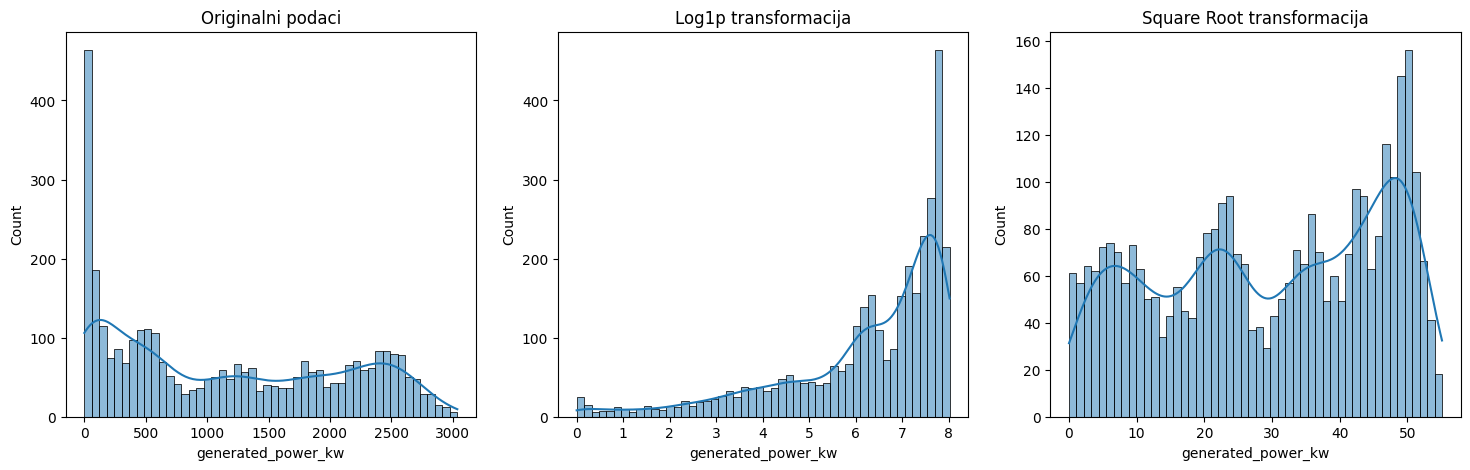

In [410]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Originalni podaci
sns.histplot(y_train, bins=50, kde=True, ax=axes[0])
axes[0].set_title("Originalni podaci")

# 2. Log transformacija
sns.histplot(np.log1p(y_train), bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log1p transformacija")

# 3. Kvadratni koren
sns.histplot(np.sqrt(y_train), bins=50, kde=True, ax=axes[2])
axes[2].set_title("Square Root transformacija")

plt.show()

Na graficima su tri histograma iste ciljne promenljive <i>generated_power_kw</i>, ali u tri razlicita prostora (bez transformacije, log1p, i sqrt). Cilj transformacije je da raspodela bude manje asimetricna, sa stabilnijom varijansom.

In [411]:
y_train_scaled = np.sqrt(y_train)
y_test_scaled = np.sqrt(y_test)

### Distribucije pre i posle transformacija

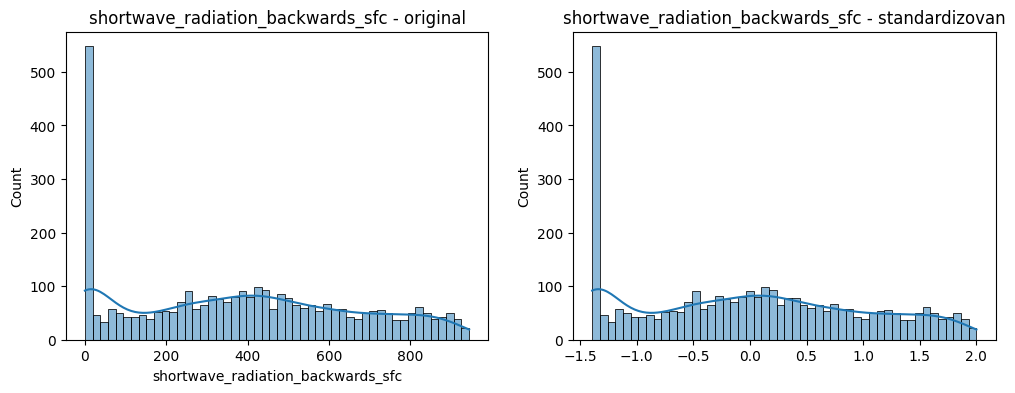

In [412]:
feature = 'shortwave_radiation_backwards_sfc'

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(X_train[feature], bins=50, kde=True, ax=axes[0])
axes[0].set_title(f"{feature} - original")

sns.histplot(
    StandardScaler().fit_transform(X_train[[feature]]).flatten(),
    bins=50, kde=True, ax=axes[1]
)
axes[1].set_title(f"{feature} - standardizovan")

plt.show()

Sa izbacenim kolonama postoje 14 kolona. Medjutim posle skaliranja podataka obrisane su originalne kolone 'zenith' i 'azimuth' (14-2=12) i dodate su 'zenith_sin', 'zenith_cos', 'azimuth_sin' i 'azimuth_cos' su 16 (12+4=16). Zbog toga su nove dimenzije (4213, 16), tj. 16 kolona.

In [413]:
print('Dimenzije trening skupa x:', X_train_scaled.shape)
print('Dimenzije trening skupa y:', y_train_scaled.shape)
print('Dimenzije test skupa x:', X_test_scaled.shape)
print('Dimenzije test skupa y:', y_test_scaled.shape)

Dimenzije trening skupa x: (3370, 15)
Dimenzije trening skupa y: (3370,)
Dimenzije test skupa x: (843, 15)
Dimenzije test skupa y: (843,)


### Kreiranje tabele sa rezultatima evaluacije

In [414]:
results_scal = pd.DataFrame(columns=["Model", "R2 score - training", "R2 score - test", "MAE - training", "MAE - test", "MSE - training", "MSE - test"])
results_scal

Empty DataFrame
Columns: [Model, R2 score - training, R2 score - test, MAE - training, MAE - test, MSE - training, MSE - test]
Index: []

### Baseline model - mean prediction

In [415]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train_scaled)

y_train_pred = dummy.predict(X_train_scaled)
y_test_pred = dummy.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred, y_train_scaled, y_train_pred)

R2 score - training: 0.000
R2 score - test: -0.001
Mean Absolute Error - training: 14.400
Mean Absolute Error - test: 15.062
Mean Squared Error - training: 265.249
Mean Squared Error - test: 287.455


In [416]:
results_scal=add_metrics(results_scal, "Baseline", metrics)
results_scal

Model  R2 score - training  R2 score - test  MAE - training  MAE - test  \
1  Baseline                  0.0         -0.00117       14.400134   15.062049   

   MSE - training  MSE - test  
1      265.249025  287.455465

### Linear Regression

In [417]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

y_train_pred=lr.predict(X_train_scaled)
y_test_pred=lr.predict(X_test_scaled)

metrics=evaluate(y_test_scaled, y_test_pred, y_train_scaled, y_train_pred)

R2 score - training: 0.744
R2 score - test: 0.747
Mean Absolute Error - training: 6.344
Mean Absolute Error - test: 6.582
Mean Squared Error - training: 68.024
Mean Squared Error - test: 72.705


In [418]:
results_scal=add_metrics(results_scal, "Linear Regression", metrics)
results_scal

Model  R2 score - training  R2 score - test  MAE - training  \
1           Baseline             0.000000        -0.001170       14.400134   
2  Linear Regression             0.743548         0.746776        6.344472   

   MAE - test  MSE - training  MSE - test  
1   15.062049      265.249025  287.455465  
2    6.581737       68.023723   72.705457

### Random Forest Regression

In [419]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_scaled)

y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_rf, y_train_scaled, y_train_pred_rf)

R2 score - training: 0.975
R2 score - test: 0.837
Mean Absolute Error - training: 1.666
Mean Absolute Error - test: 4.458
Mean Squared Error - training: 6.520
Mean Squared Error - test: 46.854


In [420]:
results_scal=add_metrics(results_scal, "Random Forest Regression", metrics)
results_scal

Model  R2 score - training  R2 score - test  \
1                  Baseline             0.000000        -0.001170   
2         Linear Regression             0.743548         0.746776   
3  Random Forest Regression             0.975418         0.836814   

   MAE - training  MAE - test  MSE - training  MSE - test  
1       14.400134   15.062049      265.249025  287.455465  
2        6.344472    6.581737       68.023723   72.705457  
3        1.665629    4.457864        6.520336   46.853772

### Decision Tree Regression

In [421]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train_scaled)

y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_dt, y_train_scaled, y_train_pred_dt)

R2 score - training: 1.000
R2 score - test: 0.683
Mean Absolute Error - training: 0.000
Mean Absolute Error - test: 6.050
Mean Squared Error - training: 0.000
Mean Squared Error - test: 91.041


In [422]:
results_scal=add_metrics(results_scal, "Decision Tree Regression", metrics)
results_scal

Model  R2 score - training  R2 score - test  \
1                  Baseline             0.000000        -0.001170   
2         Linear Regression             0.743548         0.746776   
3  Random Forest Regression             0.975418         0.836814   
4  Decision Tree Regression             1.000000         0.682915   

   MAE - training  MAE - test  MSE - training  MSE - test  
1       14.400134   15.062049      265.249025  287.455465  
2        6.344472    6.581737       68.023723   72.705457  
3        1.665629    4.457864        6.520336   46.853772  
4        0.000000    6.049754        0.000000   91.041296

### Gradient Boosting Regression

In [423]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_scaled, y_train_scaled)

y_train_pred_gbr = gbr.predict(X_train_scaled)
y_test_pred_gbr = gbr.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_gbr, y_train_scaled, y_train_pred_gbr)

R2 score - training: 0.854
R2 score - test: 0.827
Mean Absolute Error - training: 4.415
Mean Absolute Error - test: 4.913
Mean Squared Error - training: 38.662
Mean Squared Error - test: 49.671


In [424]:
results_scal=add_metrics(results_scal, "Gradient Boosting Regression", metrics)
results_scal

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.001170   
2             Linear Regression             0.743548         0.746776   
3      Random Forest Regression             0.975418         0.836814   
4      Decision Tree Regression             1.000000         0.682915   
5  Gradient Boosting Regression             0.854244         0.827001   

   MAE - training  MAE - test  MSE - training  MSE - test  
1       14.400134   15.062049      265.249025  287.455465  
2        6.344472    6.581737       68.023723   72.705457  
3        1.665629    4.457864        6.520336   46.853772  
4        0.000000    6.049754        0.000000   91.041296  
5        4.415109    4.913234       38.661728   49.671337

### K-Nearest Neighbors (KNN) Regression

In [425]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train_scaled)

y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_knn, y_train_scaled, y_train_pred_knn)

R2 score - training: 0.852
R2 score - test: 0.777
Mean Absolute Error - training: 4.481
Mean Absolute Error - test: 5.758
Mean Squared Error - training: 39.259
Mean Squared Error - test: 64.104


In [426]:
results_scal=add_metrics(results_scal, "KNN Regression", metrics)
results_scal

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.001170   
2             Linear Regression             0.743548         0.746776   
3      Random Forest Regression             0.975418         0.836814   
4      Decision Tree Regression             1.000000         0.682915   
5  Gradient Boosting Regression             0.854244         0.827001   
6                KNN Regression             0.851993         0.776735   

   MAE - training  MAE - test  MSE - training  MSE - test  
1       14.400134   15.062049      265.249025  287.455465  
2        6.344472    6.581737       68.023723   72.705457  
3        1.665629    4.457864        6.520336   46.853772  
4        0.000000    6.049754        0.000000   91.041296  
5        4.415109    4.913234       38.661728   49.671337  
6        4.480617    5.757941       39.258614   64.103780

### Support Vector Regression (SVR)

In [427]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

y_train_pred_svr = svr.predict(X_train_scaled)
y_test_pred_svr = svr.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_svr, y_train_scaled, y_train_pred_svr)

R2 score - training: 0.769
R2 score - test: 0.768
Mean Absolute Error - training: 5.514
Mean Absolute Error - test: 5.751
Mean Squared Error - training: 61.230
Mean Squared Error - test: 66.622


In [428]:
results_scal=add_metrics(results_scal, "SVR Regression", metrics)
results_scal

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.001170   
2             Linear Regression             0.743548         0.746776   
3      Random Forest Regression             0.975418         0.836814   
4      Decision Tree Regression             1.000000         0.682915   
5  Gradient Boosting Regression             0.854244         0.827001   
6                KNN Regression             0.851993         0.776735   
7                SVR Regression             0.769159         0.767964   

   MAE - training  MAE - test  MSE - training  MSE - test  
1       14.400134   15.062049      265.249025  287.455465  
2        6.344472    6.581737       68.023723   72.705457  
3        1.665629    4.457864        6.520336   46.853772  
4        0.000000    6.049754        0.000000   91.041296  
5        4.415109    4.913234       38.661728   49.671337  
6        4.480617    5.757941       39.258614   64.103780  
7        5.513599    5.750554       61.230283   66.622151

### Ridge Regression

In [429]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

metrics_ridge = evaluate(y_test_scaled, y_test_pred_ridge, y_train_scaled, y_train_pred_ridge)

R2 score - training: 0.743
R2 score - test: 0.746
Mean Absolute Error - training: 6.369
Mean Absolute Error - test: 6.592
Mean Squared Error - training: 68.163
Mean Squared Error - test: 72.880


In [430]:
results_scal = add_metrics(results_scal, "Ridge Regression", metrics_ridge)
results_scal

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.001170   
2             Linear Regression             0.743548         0.746776   
3      Random Forest Regression             0.975418         0.836814   
4      Decision Tree Regression             1.000000         0.682915   
5  Gradient Boosting Regression             0.854244         0.827001   
6                KNN Regression             0.851993         0.776735   
7                SVR Regression             0.769159         0.767964   
8              Ridge Regression             0.743022         0.746167   

   MAE - training  MAE - test  MSE - training  MSE - test  
1       14.400134   15.062049      265.249025  287.455465  
2        6.344472    6.581737       68.023723   72.705457  
3        1.665629    4.457864        6.520336   46.853772  
4        0.000000    6.049754        0.000000   91.041296  
5        4.415109    4.913234       38.661728   49.671337  
6        4.480617    5.757941       39.258614   64.103780  
7        5.513599    5.750554       61.230283   66.622151  
8        6.369090    6.591725       68.163140   72.880354

### Lasso Regression

In [431]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

metrics_lasso = evaluate(y_test_scaled, y_test_pred_lasso, y_train_scaled, y_train_pred_lasso)

R2 score - training: 0.731
R2 score - test: 0.740
Mean Absolute Error - training: 6.655
Mean Absolute Error - test: 6.799
Mean Squared Error - training: 71.420
Mean Squared Error - test: 74.644


In [432]:
results_scal = add_metrics(results_scal, "Lasso Regression", metrics_lasso)
results_scal

Model  R2 score - training  R2 score - test  \
1                      Baseline             0.000000        -0.001170   
2             Linear Regression             0.743548         0.746776   
3      Random Forest Regression             0.975418         0.836814   
4      Decision Tree Regression             1.000000         0.682915   
5  Gradient Boosting Regression             0.854244         0.827001   
6                KNN Regression             0.851993         0.776735   
7                SVR Regression             0.769159         0.767964   
8              Ridge Regression             0.743022         0.746167   
9              Lasso Regression             0.730743         0.740025   

   MAE - training  MAE - test  MSE - training  MSE - test  
1       14.400134   15.062049      265.249025  287.455465  
2        6.344472    6.581737       68.023723   72.705457  
3        1.665629    4.457864        6.520336   46.853772  
4        0.000000    6.049754        0.000000   91.041296  
5        4.415109    4.913234       38.661728   49.671337  
6        4.480617    5.757941       39.258614   64.103780  
7        5.513599    5.750554       61.230283   66.622151  
8        6.369090    6.591725       68.163140   72.880354  
9        6.654963    6.798536       71.420266   74.643866

# Optimizacija hiperparametara

### Kreiranje tabele sa rezultatima evaluacije

In [433]:
results_opt = pd.DataFrame(columns=["Model", "R2 score - training", "R2 score - test", "MAE - training", "MAE - test", "MSE - training", "MSE - test"])
results_opt

Empty DataFrame
Columns: [Model, R2 score - training, R2 score - test, MAE - training, MAE - test, MSE - training, MSE - test]
Index: []

### Random Forest Regression

In [434]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train_scaled)

best_rf = grid_rf.best_estimator_

y_train_pred_rf = best_rf.predict(X_train_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

metrics_rf_opt = evaluate(y_test_scaled, y_test_pred_rf, y_train_scaled, y_train_pred_rf)
results_opt = add_metrics(results_opt, "Random Forest Regression", metrics_rf_opt)

print(f"Najbolji parametri za Random Forest Regression: {grid_rf.best_params_}")

results_opt

R2 score - training: 0.976
R2 score - test: 0.839
Mean Absolute Error - training: 1.731
Mean Absolute Error - test: 4.702
Mean Squared Error - training: 6.441
Mean Squared Error - test: 46.085
Najbolji parametri za Random Forest Regression: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


Model  R2 score - training  R2 score - test  \
1  Random Forest Regression             0.975717         0.839493   

   MAE - training  MAE - test  MSE - training  MSE - test  
1        1.730552    4.701688        6.441055    46.08473

### Gradient Boosting Regression

In [435]:
param_grid_gb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train_scaled)

best_gb = grid_gb.best_estimator_
metrics_gb_opt = evaluate(y_test_scaled, best_gb.predict(X_test_scaled), y_train_scaled, best_gb.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "Gradient Boosting Regression", metrics_gb_opt)

print(f"Najbolji parametri za GBR: {grid_gb.best_params_}")

results_opt

R2 score - training: 0.953
R2 score - test: 0.844
Mean Absolute Error - training: 2.540
Mean Absolute Error - test: 4.500
Mean Squared Error - training: 12.544
Mean Squared Error - test: 44.715
Najbolji parametri za GBR: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


Model  R2 score - training  R2 score - test  \
1      Random Forest Regression             0.975717         0.839493   
2  Gradient Boosting Regression             0.952707         0.844264   

   MAE - training  MAE - test  MSE - training  MSE - test  
1        1.730552    4.701688        6.441055   46.084730  
2        2.540437    4.500116       12.544377   44.714745

### KNN Regression

In [436]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1 - Manhattan distance, 2 - Euclidean
}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train_scaled)

best_knn = grid_knn.best_estimator_
metrics_knn_opt = evaluate(y_test_scaled, best_knn.predict(X_test_scaled), y_train_scaled, best_knn.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "KNN Regression", metrics_knn_opt)

print(f"Najbolji parametri za KNN Regression: {grid_knn.best_params_}")

results_opt

R2 score - training: 1.000
R2 score - test: 0.808
Mean Absolute Error - training: 0.000
Mean Absolute Error - test: 5.256
Mean Squared Error - training: 0.000
Mean Squared Error - test: 55.059
Najbolji parametri za KNN Regression: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


Model  R2 score - training  R2 score - test  \
1      Random Forest Regression             0.975717         0.839493   
2  Gradient Boosting Regression             0.952707         0.844264   
3                KNN Regression             1.000000         0.808238   

   MAE - training  MAE - test  MSE - training  MSE - test  
1        1.730552    4.701688        6.441055   46.084730  
2        2.540437    4.500116       12.544377   44.714745  
3        0.000000    5.255866        0.000000   55.058726

### SVR Regression

In [437]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=3, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train_scaled, y_train_scaled)

best_svr = grid_svr.best_estimator_
metrics_svr_opt = evaluate(y_test_scaled, best_svr.predict(X_test_scaled), y_train_scaled, best_svr.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "SVR Regression", metrics_svr_opt)

print(f"Najbolji parametri za SVR Regression: {grid_svr.best_params_}")

results_opt

R2 score - training: 0.878
R2 score - test: 0.813
Mean Absolute Error - training: 3.232
Mean Absolute Error - test: 4.591
Mean Squared Error - training: 32.411
Mean Squared Error - test: 53.700
Najbolji parametri za SVR Regression: {'C': 100, 'epsilon': 0.2, 'kernel': 'rbf'}


Model  R2 score - training  R2 score - test  \
1      Random Forest Regression             0.975717         0.839493   
2  Gradient Boosting Regression             0.952707         0.844264   
3                KNN Regression             1.000000         0.808238   
4                SVR Regression             0.877811         0.812971   

   MAE - training  MAE - test  MSE - training  MSE - test  
1        1.730552    4.701688        6.441055   46.084730  
2        2.540437    4.500116       12.544377   44.714745  
3        0.000000    5.255866        0.000000   55.058726  
4        3.231942    4.591500       32.410523   53.699555

### Ridge Regression

In [438]:
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train_scaled, y_train_scaled)

best_ridge = grid_ridge.best_estimator_
metrics_ridge_opt = evaluate(y_test_scaled, best_ridge.predict(X_test_scaled), y_train_scaled, best_ridge.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "Ridge Regression", metrics_ridge_opt)

print(f"Najbolji parametri za Ridge Regression: {grid_ridge.best_params_}")

results_opt

R2 score - training: 0.744
R2 score - test: 0.747
Mean Absolute Error - training: 6.345
Mean Absolute Error - test: 6.582
Mean Squared Error - training: 68.024
Mean Squared Error - test: 72.706
Najbolji parametri za Ridge Regression: {'alpha': 0.01}


Model  R2 score - training  R2 score - test  \
1      Random Forest Regression             0.975717         0.839493   
2  Gradient Boosting Regression             0.952707         0.844264   
3                KNN Regression             1.000000         0.808238   
4                SVR Regression             0.877811         0.812971   
5              Ridge Regression             0.743548         0.746774   

   MAE - training  MAE - test  MSE - training  MSE - test  
1        1.730552    4.701688        6.441055   46.084730  
2        2.540437    4.500116       12.544377   44.714745  
3        0.000000    5.255866        0.000000   55.058726  
4        3.231942    4.591500       32.410523   53.699555  
5        6.344697    6.581756       68.023745   72.706083

### Lasso Regression

In [439]:
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train_scaled, y_train_scaled)

best_lasso = grid_lasso.best_estimator_

y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

metrics_lasso_opt = evaluate(y_test_scaled, y_test_pred_lasso, y_train_scaled, y_train_pred_lasso)
results_opt = add_metrics(results_opt, "Lasso Regression", metrics_lasso_opt)

print(f"Najbolji parametri za Lasso Regression: {grid_lasso.best_params_}")

results_opt

R2 score - training: 0.744
R2 score - test: 0.747
Mean Absolute Error - training: 6.347
Mean Absolute Error - test: 6.582
Mean Squared Error - training: 68.027
Mean Squared Error - test: 72.719
Najbolji parametri za Lasso Regression: {'alpha': 0.001}


Model  R2 score - training  R2 score - test  \
1      Random Forest Regression             0.975717         0.839493   
2  Gradient Boosting Regression             0.952707         0.844264   
3                KNN Regression             1.000000         0.808238   
4                SVR Regression             0.877811         0.812971   
5              Ridge Regression             0.743548         0.746774   
6              Lasso Regression             0.743535         0.746728   

   MAE - training  MAE - test  MSE - training  MSE - test  
1        1.730552    4.701688        6.441055   46.084730  
2        2.540437    4.500116       12.544377   44.714745  
3        0.000000    5.255866        0.000000   55.058726  
4        3.231942    4.591500       32.410523   53.699555  
5        6.344697    6.581756       68.023745   72.706083  
6        6.346802    6.581716       68.027137   72.719233

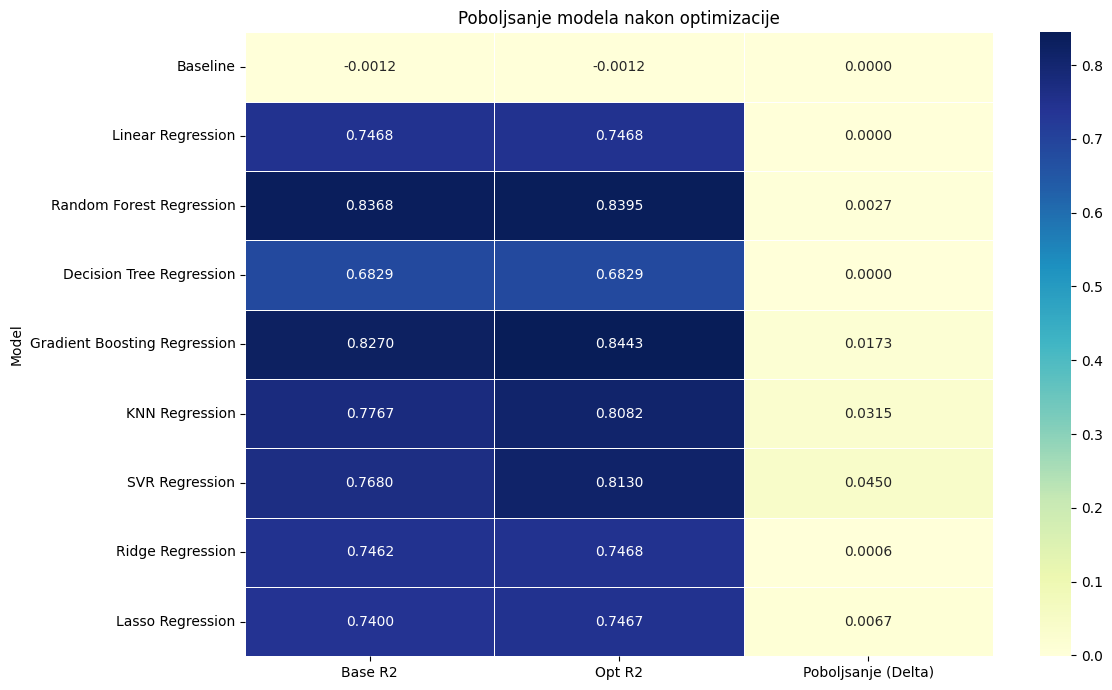

In [440]:
df_final = results_scal[['Model', 'R2 score - test']].copy()
df_final.rename(columns={'R2 score - test': 'Base R2'}, inplace=True)

df_opt_subset = results_opt[['Model', 'R2 score - test']].copy()
df_opt_subset.rename(columns={'R2 score - test': 'Opt R2'}, inplace=True)

df_comp = pd.merge(df_final, df_opt_subset, on='Model', how='left')

df_comp['Opt R2'] = df_comp['Opt R2'].fillna(df_comp['Base R2'])

df_comp['Poboljsanje (Delta)'] = df_comp['Opt R2'] - df_comp['Base R2']

df_comp.set_index('Model', inplace=True)

plt.figure(figsize=(12, 7))
sns.heatmap(df_comp[['Base R2', 'Opt R2', 'Poboljsanje (Delta)']], 
            annot=True, 
            fmt=".4f", 
            cmap="YlGnBu", 
            linewidths=.5)

plt.title("Poboljsanje modela nakon optimizacije")
plt.tight_layout()
plt.show()

# Interpretabilnost modela

In [441]:
feature_names = list(numeric_features) + list(cyclic_features)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=feature_names)

print(X_train_scaled_df.shape, X_test_scaled_df.shape)

(3370, 15) (843, 15)


## Feature importance

### Model based importance

Procenjuje koliko svaki feature utice na donosenje odluka u stablu. 

In [442]:
# Random Forest Regression
importances = best_rf.feature_importances_

fi_rf_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Gradient Boosting Regression
importances_gb = best_gb.feature_importances_

fi_gb_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False)

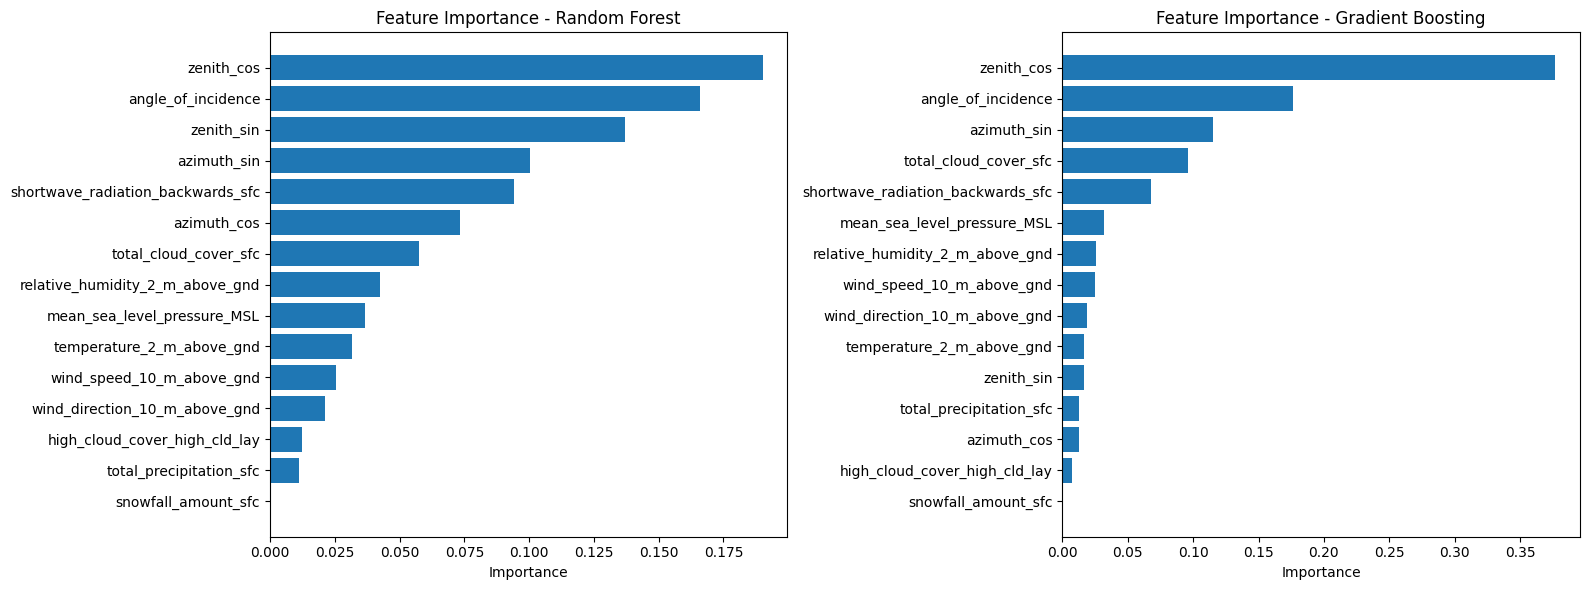

In [443]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

# Random Forest plot
axes[0].barh(fi_rf_df['Feature'], fi_rf_df['Importance'])
axes[0].invert_yaxis()
axes[0].set_title('Feature Importance - Random Forest')
axes[0].set_xlabel('Importance')

# Gradient Boosting plot
axes[1].barh(fi_gb_df['Feature'], fi_gb_df['Importance'])
axes[1].invert_yaxis()
axes[1].set_title('Feature Importance - Gradient Boosting')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

Parametri koji se ticu polozaja sunca (zenitni ugao, ugao incidencije i azimut) imaju dominantan uticaj na predikciju izlazne snage, dok meteoroloski atributi poput padavina i snega imaju znatno manji doprinos.

### Permutation Importance

Računa se permutation importance za svaki atribut koristeći najbolji Gradient Boosting model, tako što meri koliko se R² pogorša kada se vrednosti atributa nasumično permutuju na test setu. Odnosno, za svaki feature pojedinačno, nasumično se permutuju njegove vrednosti i zatim se ponavlja predikcija sa tom permutovanom kolonom. Ako je feature bitan, permutovanje njegove vredosti kvari predikciju modela, dok ako nije bitan, izvrseno permutovanje skoro da ne utice na predikciju. 
Dobija se tabela rangiranih atributa sa njihovim prosečnim i standardnim padom R², koja jasno pokazuje koji atributi najviše utiču na performanse modela.

In [444]:
from sklearn.inspection import permutation_importance
from sklearn.base import clone

# izbegavanje ucestvovanja test seta u izboru feature-a (leakage)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled_df, y_train_scaled, test_size=0.2, random_state=42
)

cloned_best_gb = clone(best_gb).fit(X_tr, y_tr)

perm = permutation_importance(
    estimator=cloned_best_gb,
    X=X_val,
    y=y_val,
    n_repeats=30,
    random_state=42,
    scoring="r2"
)

perm_df = pd.DataFrame({
    "Feature": X_train_scaled_df.columns,
    "PermImportance_mean": perm.importances_mean,
    "PermImportance_std": perm.importances_std
}).sort_values("PermImportance_mean", ascending=False)

display(perm_df.head(15))


Feature  PermImportance_mean  PermImportance_std
13                        azimuth_sin             0.309426            0.019669
10                 angle_of_incidence             0.252276            0.014127
12                         zenith_cos             0.231422            0.014883
7   shortwave_radiation_backwards_sfc             0.121046            0.010642
5               total_cloud_cover_sfc             0.069902            0.007237
1     relative_humidity_2_m_above_gnd             0.069276            0.007551
2         mean_sea_level_pressure_MSL             0.034659            0.004687
8           wind_speed_10_m_above_gnd             0.024608            0.005201
0           temperature_2_m_above_gnd             0.022877            0.004577
9       wind_direction_10_m_above_gnd             0.021110            0.003903
3             total_precipitation_sfc             0.018040            0.002981
14                        azimuth_cos             0.014921            0.003395
11                         zenith_sin             0.012202            0.002013
6       high_cloud_cover_high_cld_lay             0.006143            0.002936
4                 snowfall_amount_sfc            -0.000012            0.000417

## SHAP - Shapley Additive Explanations

S obzirom na to da su Random Forest i Gradient Boosting modeli postigli vrlo slicne performanse, SHAP analiza je primenjena na oba modela kako bi se proverila konzistentnost naucenih obrazaca. Dodatna detaljna interpretacija (dependence i force plot) kao i LIME analiza sprovedeni su samo za Gradient Boosting model, koji je ostvario najbolje rezultate.

In [445]:
# Random Forest Regression
explainer_rf = shap.Explainer(best_rf, X_train_scaled_df)
shap_values_rf = explainer_rf(X_test_scaled_df, check_additivity=False)

# Gradient Boosting Regression
explainer_gb = shap.Explainer(best_gb, X_train_scaled_df)
shap_values_gb = explainer_gb(X_test_scaled_df, check_additivity=False)

 99%|===================| 833/843 [01:30<00:01]        

### Globalna interpretacija

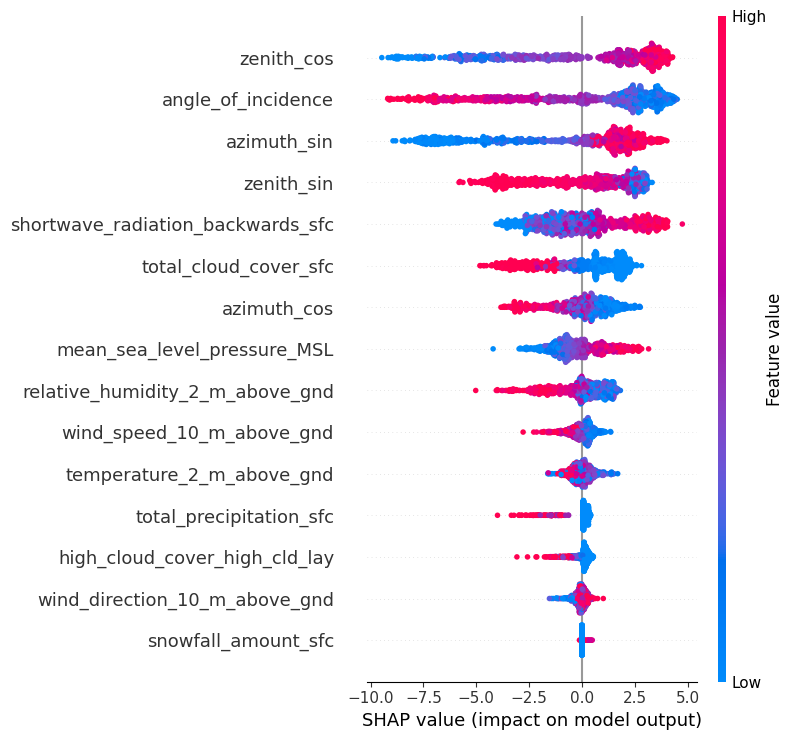

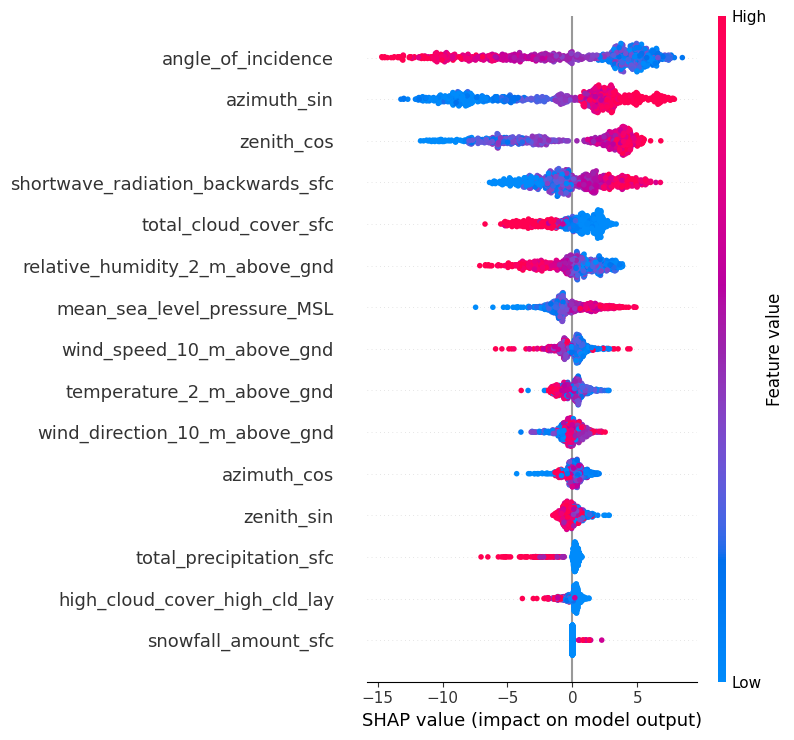

In [446]:
# Random Forest Regression
shap.summary_plot(shap_values_rf, X_test_scaled_df)

# Gradient Boosting Regression
shap.summary_plot(shap_values_gb, X_test_scaled_df)

Ako posmatramo atribut zenith_cos, vidimo da visoke vrednosti (crvene) znatno povecavaju izlaz, dok niske vrednosti (plave) znatno smanjuju izlaz. To znaci da ako je sunce visoko na nebu, bice proizvedeno vise energije. Sa druge strane, atribut zenith_cos ima suprotan efekat u odnosu na cos.

Za vise vrednosti atributa shortwave_radiation_backwards_sfc imamo pozitivan SHAP, dok za nize vrednosti imamo negativan SHAP. To znaci da ako imamo vise zracenja, imamo vecu proizvodnju energije.

Posmatranjem grafikona iznad, moze se zakljuciti da su padavine, sneg, pritisak i vlaznost slabiji atributi, jer je SHAP vrednost oko nule. Ovi atributi imaju sekundarni ili zanemarljiv uticaj u prisustvu dominantnih solarnih parametara. Ovaj zakljucak je i ocekivan: ugao pod kojim padaju suncevi zraci direktno utice na kolicinu energije koju panel moze da apsorbuje.

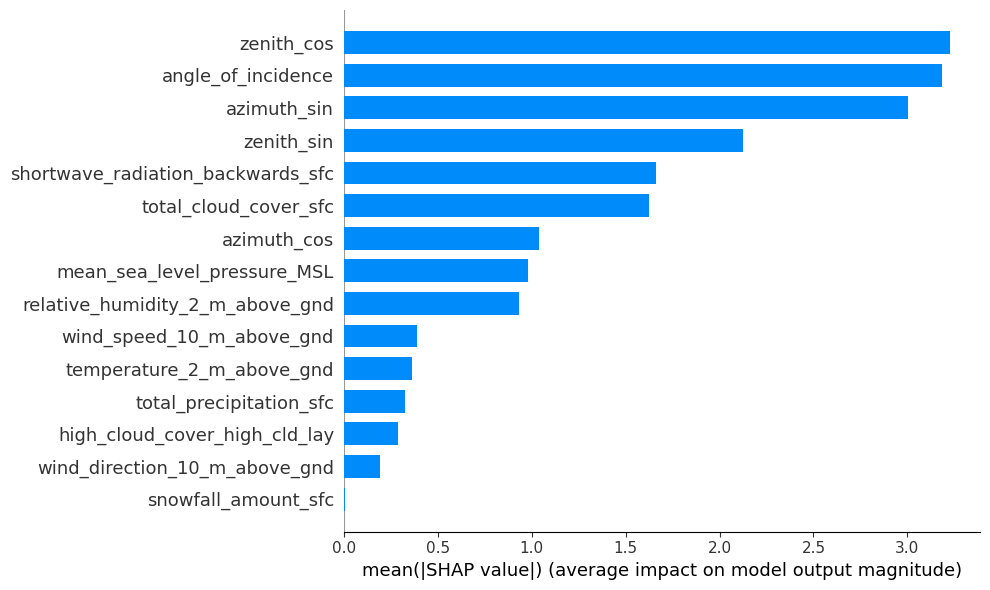

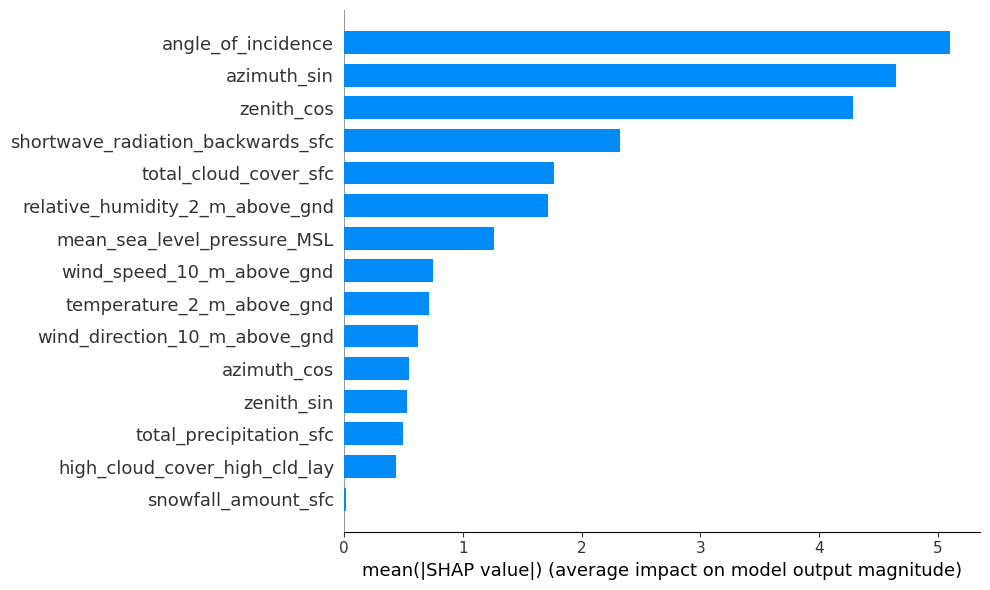

In [447]:
# Random Forest Regression
shap.summary_plot(
    shap_values_rf,
    X_test_scaled,
    plot_type="bar",
    plot_size=(10, 6)
)

# Gradient Boosting Regression
shap.summary_plot(
    shap_values_gb,
    X_test_scaled,
    plot_type="bar",
    plot_size=(10, 6)
)

### Lokalna interpretacija

#### Gradient Boosting Regression

##### Dependence plot

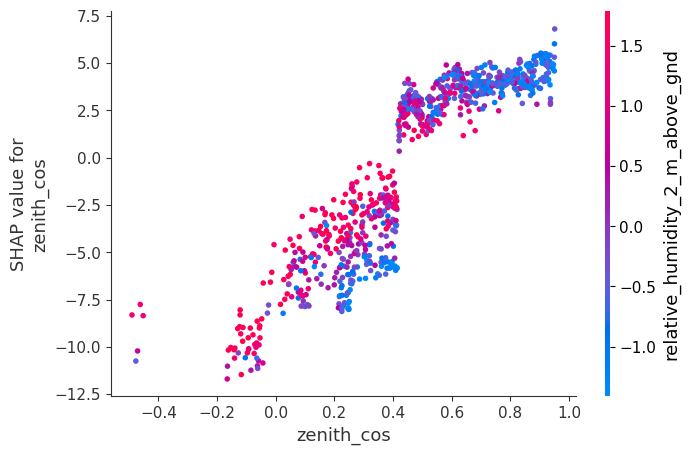

In [448]:
shap.dependence_plot(
    fi_gb_df.iloc[0]['Feature'],
    shap_values_gb.values,
    X_test_scaled_df
)

Na osnovu grafikona koji prikazuje zavisnost izmedju vrednosti <i>zenith_cos</i> i njegovog SHAP doprinosa, moze se videti da SHAP ima nisku vrednost (smanjuje predikciju) za niske vrednosti <i>zenith_cos</i>. Kako <i>zenith_cos</i> raste (sunce je visoko), SHAP prelazi u pozitivne vrednosti, odnosno ima jak pozitivan doprinos. 

Na grafiku je prikazana i interakcija sa <i>relative_humidity_2_m_above_gnd</i>, gde boja tacaka predstavlja <i>relative_humidity_2_m_above_gnd</i>. Za iste vrednosti <i>zenith_cos</i>, razlicita vlaznost daje blago razlicite SHAP vrednosti (tj. postoji interakcija).

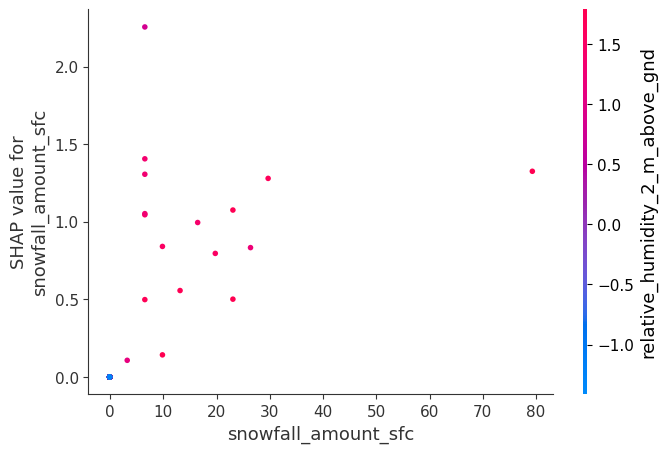

In [449]:
shap.dependence_plot(
    fi_gb_df.iloc[-1]['Feature'],
    shap_values_gb.values,
    X_test_scaled_df
)

Skoro sve SHAP vrednosti za <i>snowfall_amount_sfc</i> su 0. Tacke su retke i rasute, a osa x je praktično od 0 do ~1.7, ali većina uzoraka je blizu 0. Iz ovog se moze zakljuciti da kolicina snega gotovo ne utice na proizvodnju solarne energije u ovom skupu podataka. To moze znaciti da je padavina retka pojava u ovim podacima (mnogo nula) i zbog toga model nema dovoljno informacija da nauci pouzdanu zavisnost. 

Ovaj grafikon opravdava mogucnost redukcije dimenzionalnosti, jer pokazuje atribut sa vrlo malim doprinosom.

##### Force plot

In [450]:
# Indeksi po stvarnom y (u kW) – radi interpretacije
y_test_arr = np.array(y_test)

i_low  = int(np.argmin(y_test_arr))
i_high = int(np.argmax(y_test_arr))
i_mid  = int(np.argmin(np.abs(y_test_arr - np.median(y_test_arr))))

In [451]:
shap.force_plot(
        explainer_gb.expected_value,
        shap_values_gb[i_low].values,
        X_test_scaled_df.iloc[i_low]
    )

In [452]:
shap.force_plot(
        explainer_gb.expected_value,
        shap_values_gb[i_mid].values,
        X_test_scaled_df.iloc[i_mid]
    )

In [453]:
shap.force_plot(
        explainer_gb.expected_value,
        shap_values_gb[i_high].values,
        X_test_scaled_df.iloc[i_high]
    )

Force plot prikazuje kako model dolazi do konkretne predikcije za jednu instancu. 

Ako posmatramo force plot za instancu kada je proizvedena najveca kolicina energije (treci plot), ocekivana vrednost modela preko background skupa je 30.99, a finalna predikcija je 39.65 (za ovu instancu). Moze se videti da najveci pozitivni doprinos (povecava predikciju) za ovu instancu imaju <i>zenith_cos = 0.7268, shortwave_radiation_backwards_sfc = 0.949, angle_of_incidence = -1.748 i total_cloud_cover_sfc = -0.7944</i>. Drugim recima, kad je sunce visoko, ima povoljan polozaj, i nema oblasnosti, proizvodnja raste. Negativni doprinos (smanjuju predikciju) ima <i>azimuth_cos = -1.527 i wind_direction_10_m_above_gnd = -1.527</i>, koji govori da je u tom trenutku orijentacija sunca u nepovoljnom polozaju u odnosu na orijentaciju panela.

##### Waterfall plot

LOW index = 483 y_true_kw = 0.003205128


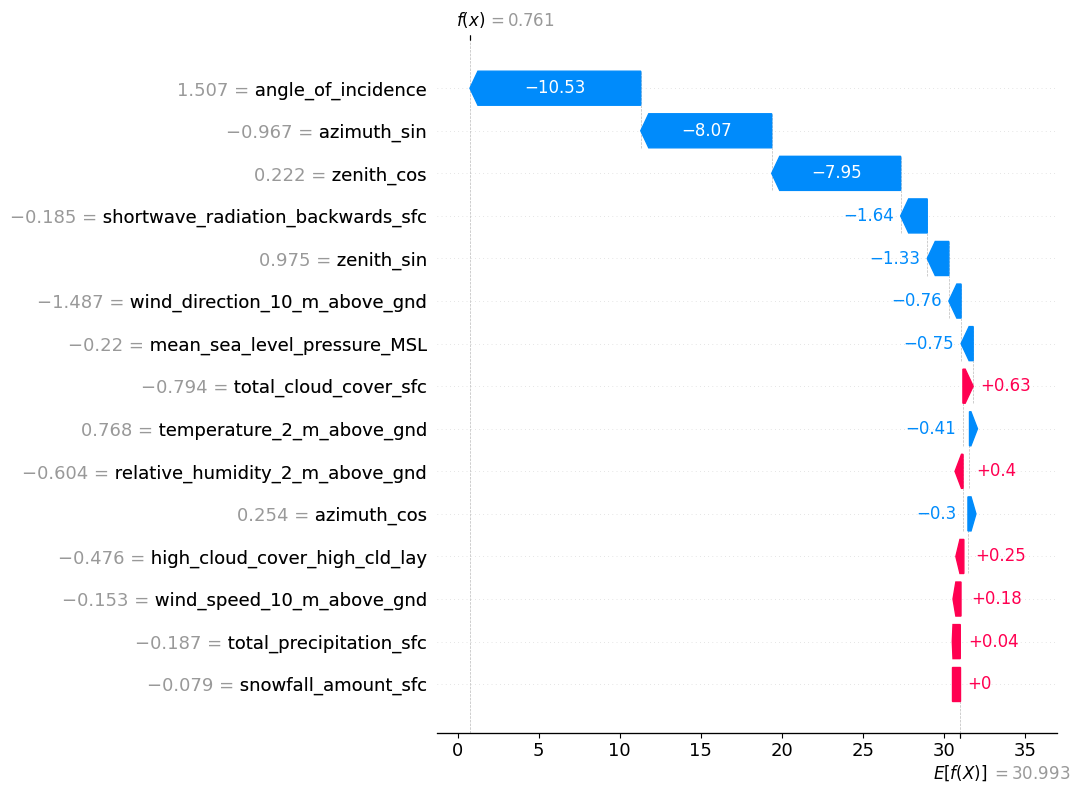

MID index = 9 y_true_kw = 916.91916


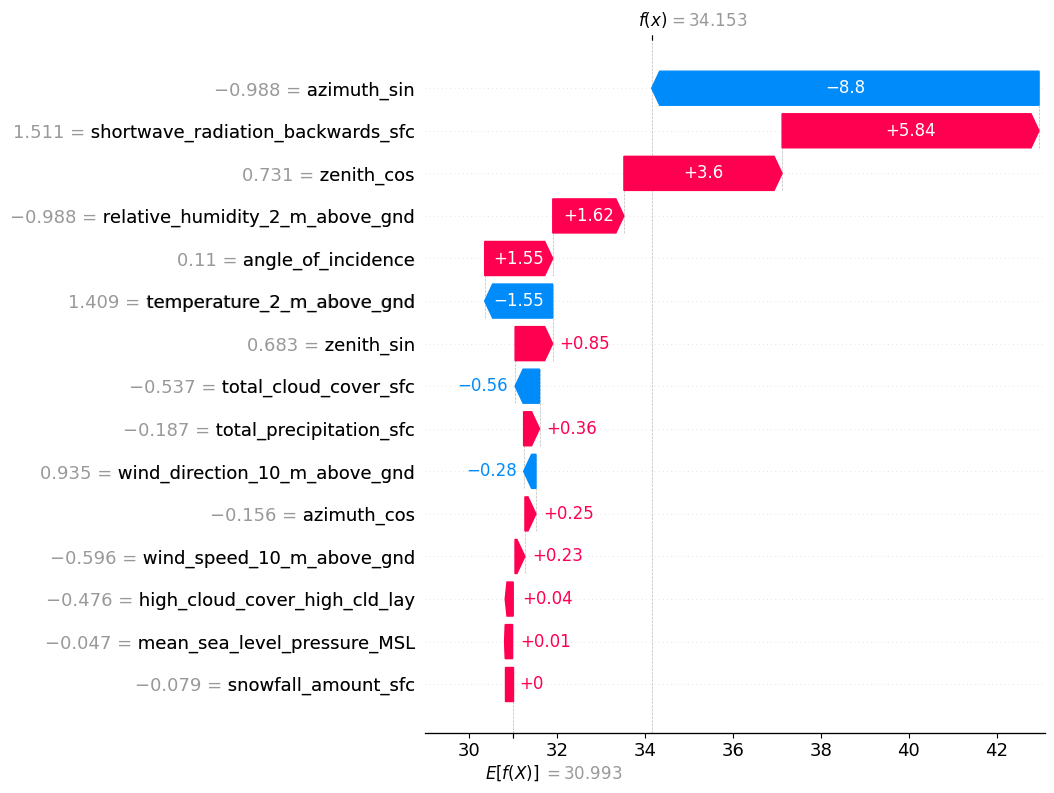

HIGH index = 282 y_true_kw = 3056.7941


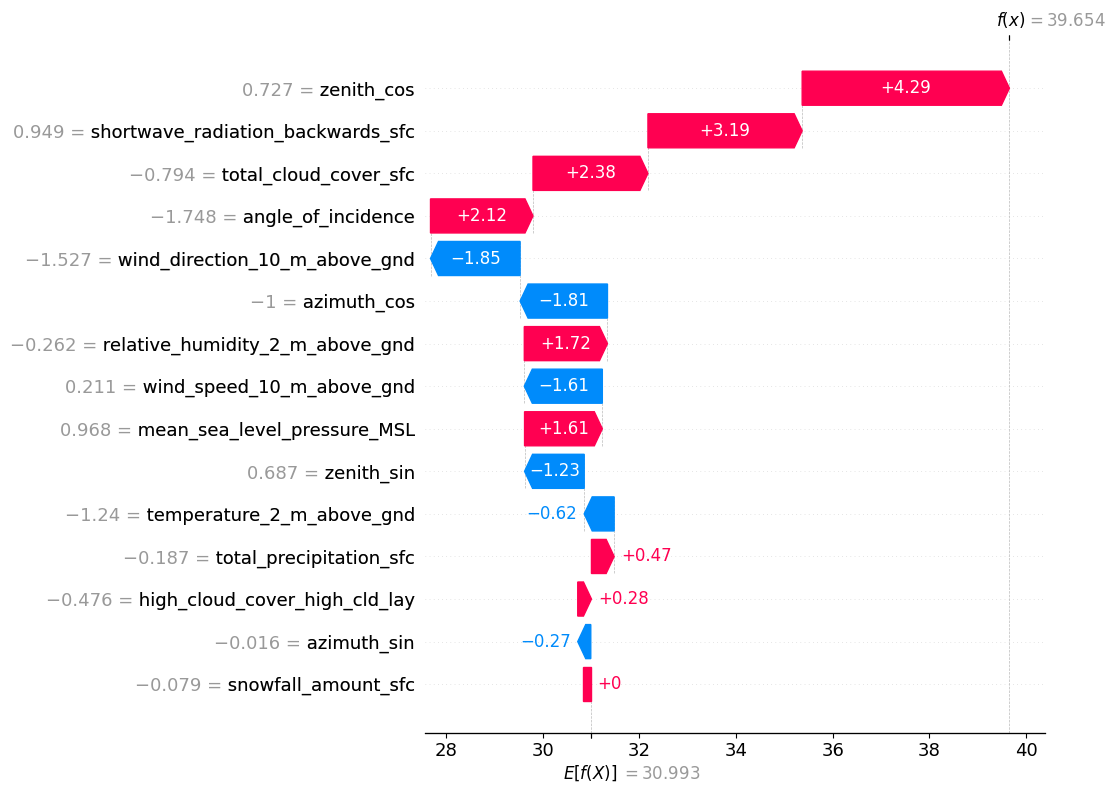

In [454]:
for idx, name in [(i_low, "LOW"), (i_mid, "MID"), (i_high, "HIGH")]:
    print(name, "index =", idx, "y_true_kw =", y_test_arr[idx])
    shap.plots.waterfall(shap_values_gb[idx], max_display=15)

## LIME - Local Interpretable Model-Agnostic Explanations

LIME se koristi za lokalnu interpretaciju pojedinacnih predikcija. Cilj LIME metode je da aproksimira ponasanje modela u maloj okolini jedne konkretne instance pomocu jednostavnog, interpretabilnog modela (najcesce linearne regresije). Na taj nacin moguce je objasniti zasto je model doneo odredjenu predikciju za konkretan vremenski trenutak.

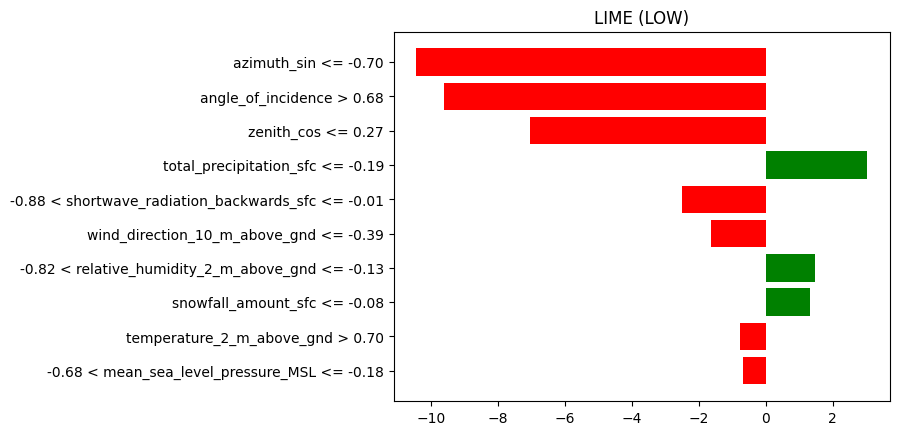

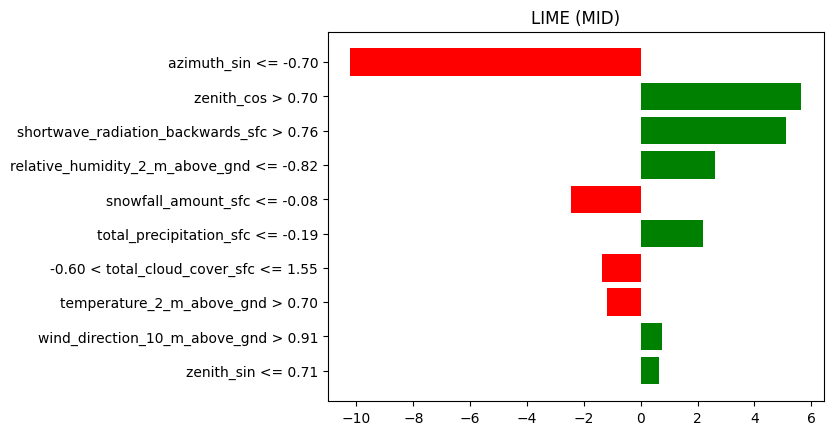

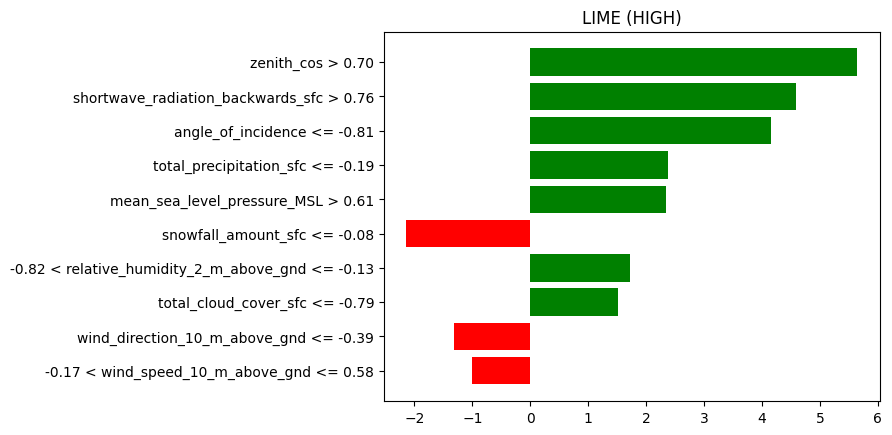

In [455]:
lime_explainer = LimeTabularExplainer(
    training_data=X_train_scaled_df.values,
    feature_names=feature_names,
    mode="regression",
    discretize_continuous=True, 
    random_state=42
)

# Koristi se ista instanca kao kod SHAP force plot-a
# Objasnjenje u sqrt prostoru
for idx, name in [(i_low, "LOW"), (i_mid, "MID"), (i_high, "HIGH")]:
    exp = lime_explainer.explain_instance(
        data_row=X_test_scaled_df.iloc[idx].values,
        predict_fn=best_gb.predict,
        num_features=10
    )
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME ({name})")
    plt.show()



Lokalno objasnjenje pokazuje da su za posmatrani uzorak najuticajniji atributi povezani sa uglovima upada i zenitnim parametrima, dok meteoroloski faktori poput vetra, vlaznosti i oblacnosti imaju sekundarni uticaj. Ovo ukazuje da model u najvecoj meri donosi odluku na osnovu geometrijskih parametara i intenziteta suncevog zracenja, sto se poklapa i sa SHAP analizom.

Prvi prikazani grafikon je lokalno LIME objasnjenje za instancu iz test skupa sa najmanjom proizvodnjom solarne energije (LOW). Najveci negativni uticaj imaju <i>azimuth_sin i angle_of_incidence</i>. Veliki ugao upada suncevih zraka znaci da sunce ne pada direktno na panel, energija se slabije apsorbuje i model smanjuje predikciju. Takodje, <i>azimuth_sin</i> ukazuje da nepovoljna orijentacija sunca smanjuje proizvodnju energije. Kada je sunce nisko iznad horizonta (rano ujutro, kasno popodne, zimski period...), doci ce do niske proizvodnje energije. To ukazuje niska vrednost <i>zenith_cos</i>. Atribut <i>total_precipitation_sfc</i> ima mali pozitivan doprinos. Vrednost je <= -0.19, sto znaci da za to merenje nije imalo padavina, sto je blago ublazilo negativne efekte ostalih faktora, ali nedovoljno da nadvlada dominantne solarne faktore.

Kod MID instance vidi se kombinacija jakih pozitivnih i jakih negativnih uticaja, sto daje umerenu predikciju. Najjaci negativni doprinos ponovo dolazi od <i>azimuth_sin</i> <= -0.70 (znacajno snizava predikciju). Najjaci pozitivni doprinosi dolaze od <i>zenith_cos, shortwave_radiation_backwards_sfc i relative_humidity_2_m_above_gnd</i>, odnosno sunce je dovoljno visoko na nebu (povoljan polozaj), visoka radijacija (direktno povecava proizvodnju), niska relativna vlaznost (cesto indikator vedrijih uslova, pa model to koristi kao pozitivan signal).

# Redukcija dimenzionalnosti

In [456]:
results_reduced = pd.DataFrame(columns=["Model", "R2 score - training", "R2 score - test", "MAE - training", "MAE - test", "MSE - training", "MSE - test"])
results_reduced

Empty DataFrame
Columns: [Model, R2 score - training, R2 score - test, MAE - training, MAE - test, MSE - training, MSE - test]
Index: []

## Feature selection (selekcija atributa)

### Selekcija atributa zasnovana na interpretabilnosti modela

Prvi pristup za redukciju dimenzionalnosti, zasnovan na interpretabilnosti modela. Cilj: da identifikujemo atribute sa malim uticajem na **generated_power_kw** (odnosno na njegovu transformaciju) i da proverimo da li izbacivanje tih atributa menja performanse modela.

SHAP analiza je pokazala da odredjeni atributi imaju dominantan uticaj na predikciju, dok su drugi atributi (npr. snowfall_amount_sfc, pritisak, vlaznost) zanemarljivi. Ovo omogucava uklanjanje atributa sa malim SHAP doprinosom.

In [457]:
# Prosecna apsolutna SHAP vrednost po atributu
mean_abs_shap = np.mean(np.abs(shap_values_gb.values), axis=0)

shap_importance_df = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False)

shap_importance_df

feature  mean_abs_shap
10                 angle_of_incidence       5.097107
13                        azimuth_sin       4.644287
12                         zenith_cos       4.283074
7   shortwave_radiation_backwards_sfc       2.321823
5               total_cloud_cover_sfc       1.767127
1     relative_humidity_2_m_above_gnd       1.713773
2         mean_sea_level_pressure_MSL       1.263291
8           wind_speed_10_m_above_gnd       0.745935
0           temperature_2_m_above_gnd       0.720004
9       wind_direction_10_m_above_gnd       0.622630
14                        azimuth_cos       0.548074
11                         zenith_sin       0.528811
3             total_precipitation_sfc       0.493776
6       high_cloud_cover_high_cld_lay       0.439314
4                 snowfall_amount_sfc       0.019013

In [458]:
top_features = shap_importance_df.head(10)["feature"].tolist()

feature_indices = [
    X_train.columns.get_loc(f)
    for f in top_features
]

X_train_reduced_scaled = X_train_scaled[:, feature_indices]
X_test_reduced_scaled = X_test_scaled[:, feature_indices]

print(f"Dimenzije redukovanog trening skupa: {X_train_reduced_scaled.shape}")
print(f"Dimenzije redukovanog test skupa: {X_test_reduced_scaled.shape}")

dropped_features = [f for f in X_train.columns if f not in top_features]

print("Izbacene kolone:")
print(dropped_features)

Dimenzije redukovanog trening skupa: (3370, 10)
Dimenzije redukovanog test skupa: (843, 10)
Izbacene kolone:
['total_precipitation_sfc', 'snowfall_amount_sfc', 'high_cloud_cover_high_cld_lay', 'zenith_sin', 'azimuth_cos']


In [459]:
gbr = GradientBoostingRegressor(**best_gb.get_params())
gbr.fit(X_train_reduced_scaled, y_train_scaled)

y_train_pred_gbr = gbr.predict(X_train_reduced_scaled)
y_test_pred_gbr = gbr.predict(X_test_reduced_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_gbr, y_train_scaled, y_train_pred_gbr)

R2 score - training: 0.951
R2 score - test: 0.837
Mean Absolute Error - training: 2.574
Mean Absolute Error - test: 4.632
Mean Squared Error - training: 12.923
Mean Squared Error - test: 46.740


In [460]:
results_reduced=add_metrics(results_reduced, "Gradient Boosting - Feature Selection", metrics)
results_reduced

Model  R2 score - training  \
1  Gradient Boosting - Feature Selection             0.951279   

   R2 score - test  MAE - training  MAE - test  MSE - training  MSE - test  
1         0.837209        2.573638    4.632326       12.923206   46.740494

### Selekcija atributa koriscenjem Permutation Importance

Drugi pristup za redukciju dimenzionalnosti koriscenjem **Permutation Importance** (model-agnosticko) na najboljem modelu (optimizovani Gradient Boosting), zatim cemo
napraviti *reduced* skup sa odabranim atributima i ponovo trenirati iste modele radi poredjenja.

Permutation importance je vec izvrsen u sekciji "Feature importance", tako da vec postoji tabela sa feature-ima i njihovim uticajem na performanse modela <i>perm_df</i>.

#### Permutation importance grafik najuticajnijih atributa

Ovaj blok vizuelno prikazuje najvažnije atribute na osnovu permutation importance.
Dobija se horizontalni bar-graf koji intuitivno pokazuje koji atributi imaju najveći uticaj na R² i koliki je njihov relativni doprinos.

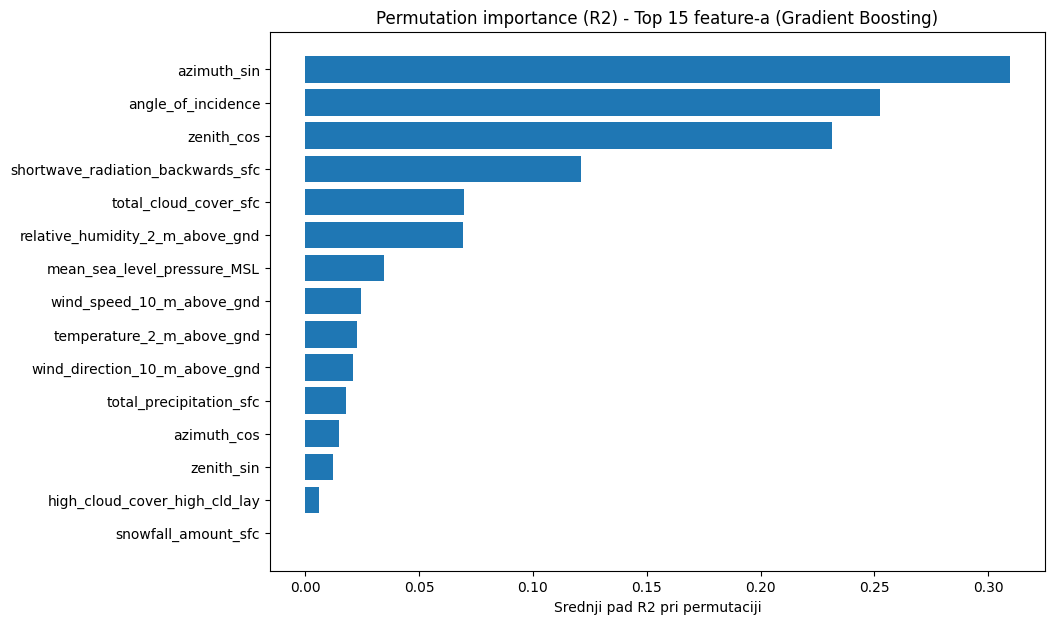

In [461]:
top_n = min(20, len(perm_df))
plot_df = perm_df.head(top_n).copy().sort_values("PermImportance_mean")

plt.figure(figsize=(10, 7))
plt.barh(plot_df["Feature"], plot_df["PermImportance_mean"])
plt.title(f"Permutation importance (R2) - Top {top_n} feature-a (Gradient Boosting)")
plt.xlabel("Srednji pad R2 pri permutaciji")
plt.show()

#### Selekcija atributa zasnovana na permutation importance

Biraju se atribute koji imaju pozitivan uticaj na model, odnosno one čijom permutacijom dolazi do pada R², što znači da doprinose tačnosti predikcije.
Formira se lista zadržanih atributa za redukovani model, uz sigurnosni mehanizam koji uvek obezbeđuje izbor atributa čak i ako nijedan nema pozitivnu važnost.

In [462]:
K = 10
topK_features = perm_df["Feature"].head(K).tolist()

X_train_topK = X_train_scaled_df[topK_features]
X_test_topK  = X_test_scaled_df[topK_features]

print(f"Ukupno atributa pre: {len(feature_names)}")
print(f"Zadržano atributa: {len(topK_features)}")

print("\nZadržani atributi:")
print(topK_features)


dropped_features = [f for f in X_train.columns if f not in topK_features]
print("\nIzbaceni atributi:")
print(dropped_features)

Ukupno atributa pre: 15
Zadržano atributa: 10

Zadržani atributi:
['azimuth_sin', 'angle_of_incidence', 'zenith_cos', 'shortwave_radiation_backwards_sfc', 'total_cloud_cover_sfc', 'relative_humidity_2_m_above_gnd', 'mean_sea_level_pressure_MSL', 'wind_speed_10_m_above_gnd', 'temperature_2_m_above_gnd', 'wind_direction_10_m_above_gnd']

Izbaceni atributi:
['total_precipitation_sfc', 'snowfall_amount_sfc', 'high_cloud_cover_high_cld_lay', 'zenith_sin', 'azimuth_cos']


#### Treniranje i evaluacija na reduced

Ovaj blok trenira sve izabrane modele na redukovanom skupu atributa, pravi predikcije na trening i test podacima i računa iste evaluacione metrike kao u baseline varijanti.
Dobija se tabela results_reduced sa performansama svakog modela nakon redukcije dimenzionalnosti, spremna za direktno poređenje sa rezultatima pre redukcije.

In [463]:
gbr_topK = clone(best_gb)
gbr_topK.fit(X_train_topK, y_train_scaled)

y_train_pred_topK = gbr_topK.predict(X_train_topK)
y_test_pred_topK  = gbr_topK.predict(X_test_topK)

metrics_topK = evaluate(y_test_scaled, y_test_pred_topK, y_train_scaled, y_train_pred_topK)

R2 score - training: 0.951
R2 score - test: 0.834
Mean Absolute Error - training: 2.596
Mean Absolute Error - test: 4.662
Mean Squared Error - training: 13.110
Mean Squared Error - test: 47.664


In [464]:
results_reduced=add_metrics(results_reduced, "Gradient Boosting - Permutation Importance", metrics_topK)
results_reduced

Model  R2 score - training  \
1       Gradient Boosting - Feature Selection             0.951279   
2  Gradient Boosting - Permutation Importance             0.950573   

   R2 score - test  MAE - training  MAE - test  MSE - training  MSE - test  
1         0.837209        2.573638    4.632326       12.923206   46.740494  
2         0.833992        2.595587    4.662002       13.110463   47.664059

## PCA redukcija

Drugi pristup za redukciju dimenzionalnosti koji se zasniva na statistickoj transformaciji. 

Ovaj blok radi PCA redukciju (zadržava 95% varijanse) nad skaliranim postojećim kolonama i potom trenira Random Forest u pipeline-u, pri čemu se posebno pravi preprocessor da ne bi pucao zbog kolona koje više ne postoje (npr. zenith).
Dobija se broj PCA komponenti koje zamenjuju originalne atribute i metrike modela (metrics_pca) koje pokazuju kako se Random Forest ponaša kada umesto originalnih feature-a koristi PCA komponente.

### PCA sa fiksnim brojem komponenti

Definise se konstantan broj komponenti koje se zadrzavaju na osnovu analize kumulativne objasnjene varijanse. Ovaj grafik pokazuje koliki procenat ukupne varijanse podataka je objasnjen prvim k komponentama. Za prag je izabrana vrednost od 95% koji predstavlja balans izmedju agresivne redukcije (oko 90%) i minimalnog gubitka informacije (oko 99%).

In [465]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

cumulative_variance

array([0.26612109, 0.41282199, 0.53387434, 0.63087171, 0.71295081,
       0.7904392 , 0.85893518, 0.91046442, 0.94916627, 0.97271717,
       0.98748905, 0.99727416, 0.99904517, 0.99990965, 1.        ])

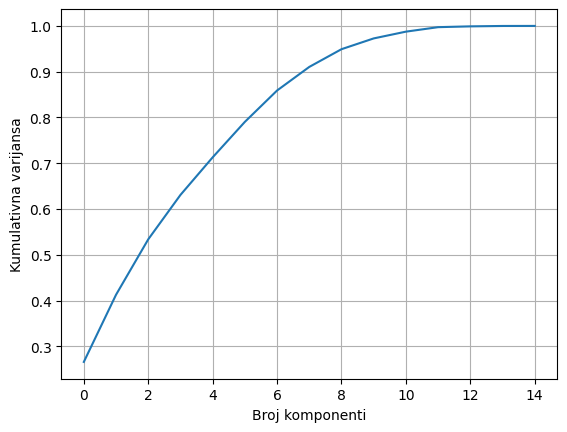

In [466]:
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.xlabel("Broj komponenti")
plt.ylabel("Kumulativna varijansa")
plt.grid(True)
plt.show()

In [467]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [468]:
gbr = GradientBoostingRegressor(**best_gb.get_params())
gbr.fit(X_train_pca, y_train_scaled)

y_train_pred_gbr = gbr.predict(X_train_pca)
y_test_pred_gbr = gbr.predict(X_test_pca)

metrics = evaluate(y_test_scaled, y_test_pred_gbr, y_train_scaled, y_train_pred_gbr)

R2 score - training: 0.907
R2 score - test: 0.730
Mean Absolute Error - training: 3.719
Mean Absolute Error - test: 6.503
Mean Squared Error - training: 24.598
Mean Squared Error - test: 77.567


In [469]:
results_reduced=add_metrics(results_reduced, "Gradient Boosting - fixed PCA", metrics)
results_reduced

Model  R2 score - training  \
1       Gradient Boosting - Feature Selection             0.951279   
2  Gradient Boosting - Permutation Importance             0.950573   
3               Gradient Boosting - fixed PCA             0.907265   

   R2 score - test  MAE - training  MAE - test  MSE - training  MSE - test  
1         0.837209        2.573638    4.632326       12.923206   46.740494  
2         0.833992        2.595587    4.662002       13.110463   47.664059  
3         0.729844        3.718978    6.503308       24.597806   77.567061

### PCA sa adaptivnim brojem komponenti

Broj komponenti se ne definise eksplicitno, vec se odredjuje na osnovu procenta zadrzane varijanse. PCA automatski bira minimalan broj komponenti potreban da zadrzi 95% ukupne varijanse.

In [470]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import clone

pca = PCA(n_components=0.95, random_state=42)
gb_for_pca = clone(best_gb)

pipe_pca = Pipeline(steps=[
    ("pca", pca),
    ("model", gb_for_pca)
])

pipe_pca.fit(X_train_scaled_df, y_train_scaled)

y_train_pred_pca = pipe_pca.predict(X_train_scaled_df)
y_test_pred_pca  = pipe_pca.predict(X_test_scaled_df)

metrics_pca = evaluate(y_test_scaled, y_test_pred_pca, y_train_scaled, y_train_pred_pca)
print("PCA broj komponenti:", pipe_pca.named_steps["pca"].n_components_)
metrics_pca

results_reduced=add_metrics(results_reduced, "Gradient Boosting - auto PCA", metrics_pca)
results_reduced


R2 score - training: 0.933
R2 score - test: 0.787
Mean Absolute Error - training: 3.167
Mean Absolute Error - test: 5.630
Mean Squared Error - training: 17.784
Mean Squared Error - test: 61.088
PCA broj komponenti: 10


Model  R2 score - training  \
1       Gradient Boosting - Feature Selection             0.951279   
2  Gradient Boosting - Permutation Importance             0.950573   
3               Gradient Boosting - fixed PCA             0.907265   
4                Gradient Boosting - auto PCA             0.932952   

   R2 score - test  MAE - training  MAE - test  MSE - training  MSE - test  
1         0.837209        2.573638    4.632326       12.923206   46.740494  
2         0.833992        2.595587    4.662002       13.110463   47.664059  
3         0.729844        3.718978    6.503308       24.597806   77.567061  
4         0.787239        3.166774    5.630314       17.784434   61.087770

# Zakljucak

In [471]:
gb_results = results[results["Model"].str.contains("Gradient Boosting", na=False)].copy()
gb_results.loc[:, "Model"] = "Gradient Boosting (original)"

gb_results_scaled = results_scal[results_scal["Model"].str.contains("Gradient Boosting", na=False)].copy()
gb_results_scaled.loc[:, "Model"] = "Gradient Boosting (scaled)"

gb_results_optimized = results_opt[results_opt["Model"].str.contains("Gradient Boosting", na=False)].copy()
gb_results_optimized.loc[:, "Model"] = "Gradient Boosting (optimized)"

gb_results_reduced = results_reduced[results_reduced["Model"].str.contains("Gradient Boosting", na=False)]

gb_all = pd.concat(
    [gb_results, gb_results_scaled, gb_results_optimized, gb_results_reduced],
    ignore_index=True
)

gb_all


Model  R2 score - training  \
0                Gradient Boosting (original)             0.830656   
1                  Gradient Boosting (scaled)             0.854244   
2               Gradient Boosting (optimized)             0.952707   
3       Gradient Boosting - Feature Selection             0.951279   
4  Gradient Boosting - Permutation Importance             0.950573   
5               Gradient Boosting - fixed PCA             0.907265   
6                Gradient Boosting - auto PCA             0.932952   

   R2 score - test  MAE - training  MAE - test  MSE - training     MSE - test  
0         0.799517      262.871846  287.955759   147505.742435  183133.687256  
1         0.827001        4.415109    4.913234       38.661728      49.671337  
2         0.844264        2.540437    4.500116       12.544377      44.714745  
3         0.837209        2.573638    4.632326       12.923206      46.740494  
4         0.833992        2.595587    4.662002       13.110463      47.664059  
5         0.729844        3.718978    6.503308       24.597806      77.567061  
6         0.787239        3.166774    5.630314       17.784434      61.087770

Baseline Gradient Boosting je dao dobru polaznu osnovu sa R2 test: 0.79952.

Iako je Gradient Boosting baziran na stablima, koja teorijski ne zahtevaju skaliranje, sa skaliranim podacima je imao bolje performanse u odnosu na baseline model (R2 test: 0.827). Razlika izmedju trening i test metrika je bila umerena, sto znaci da nije dolazilo do overfitting-a.

Nakon optimizacije hiperparametara dobili smo najbolji model za GBR, sa R2 test: 0.844, dok je R2 training bilo 0.9527, sto ukazuje da je model poprilicno naucio obrasce u podacima, ali na osnovu dobrog R2 test skora, moze se reci da nije doslo do overfitting-a.

Feature selection tehnikom zasnovanoj na interpretabilnosti modela smo uklonili atribute sa najmanjim doprinosom. Medjutim, tacnost je opala na R2 test: 0.837. Slicni rezultati su dobijeni i tehnikom zasnovanoj na permutation importance, gde je dobijen R2 test: 0.834.

Koriscenjem PCA smo dobili najlosije rezultate, sto moze ukazati da ova tehnika nije najbolje resenje za ovaj problem. Ovo pokazuje i u praksi da PCA, koji unistava originalnu strukturu feature-a, ne daje poboljsanja kod tree-based modela, koji najbolje rade sa originalnim splitovima. Prvo je odabran fiksni broj komponenti koje se zadrzavaju baziran na analizi kumulativne objasnjene varijanse, gde je izabran prag od 95%. Nakon toga je pokusana PCA redukcija sa adaptivnim brojem komponenti, gde je takodje zadato da se zadrzi 95% ukupne varijanse. U prvom slucaju je dobijen rezultat od R2 test: 0.73, a u drugom 0.79.